# Resumen porjecto: Salud Emocional Jove 2024 (SEJ24) 

## Motivaci√≥n

La etapa de la adolescencia comporta retos en el desarrollo personal y relacional, siendo el componente socioemocional una pieza clave para un correcto desarrollo. Para evitar problemas durante esta etapa, es necesario mirar con una perspectiva salutog√©nica como se comportan los y las j√≥venes en momentos de complejidad emocional, con la finalidad de dise√±ar y mejorar las herramientas de soporte y acompa√±amiento a su alcance.

## Breve Introducci√≥n al estudio

El estudio Salud Emocional Jove (SEJ) pretende medir el estado emocional de los y las j√≥venes de una poblaci√≥n concreta y evaluar su entorno con el objetivo final de promover el bienestar socioemocional.

## Objetivos principales

En primer lugar, se necesita una imagen diagn√≥stica del estado emocional y patrones de comportamiento actuales de los y las j√≥venes:
- Identificar <font color="blue">*el estado actual*</font> de salud socioemocional.
- Identificar <font color="green">*el estado deseado*</font> de salud socioemocional.
- Identificar <font color="orange">*los patrones de comportamiento*</font> en situaciones complejas
- Identificar <font color="red">*las necesidades*</font> de soporte socioemocional.

En segundo lugar, se necesita conocer como los recursos de soporte y acompa√±amiento de su entorno:
- Realizar un <font color="purple">*mapeo de los recursos y acciones*</font> que tengan relaci√≥n con promover la salud socioemocional.
- Desarrollar <font color="magenta">*una propuesta de buenas pr√°cticas*</font> en favor de una promoci√≥n de la salud socioemocional.

## M√©todo

Para poder abordar los objetivos principales del estudio, la encuesta SEJ<sup>&#174;</sup> explora tres √°mbitos claros dentro del desarrollo socioemocional:
1. <font color="blue">la conciencia del sentir</font>, ligado al objetivo de identificar <font color="blue">*el estado actual*</font> de salud socioemocional.
2. <font color="green">la elecci√≥n personal</font>, ligado al objetivo de identificar <font color="green">*el estado deseado*</font> de salud socioemocional.
3. <font color="orange">la responsabilidad individual</font>, ligada al objetivo de identificar <font color="orange">*los patrones de comportamiento*</font> en situaciones complejas
4. <font color="purple">evaluaci√≥n del entorno</font>, ligado a identificar <font color="red">*las necesidades*</font> de soporte socioemocional y a realizar un <font color="purple">*mapeo de los recursos y acciones*</font>.
Teniendo en cuenta todo lo anterior y su an√°lisis, se podr√° desarrollar <font color="magenta">*una propuesta de buenas pr√°cticas*</font> en favor de una promoci√≥n de la salud socioemocional.

# Importe de paquetes y definici√≥n de variables de inter√©s

## Importe de paquetes

In [1]:
# Importando paquetes
import pandas as pd #paquete para datos en tablas
import matplotlib.pyplot as plt #paquete para plotear
import seaborn as sns #paquete para plotear
import numpy as np #paquete para operaciones matematicas
import os #paquete que ayuda al sistema operativo
import scipy # paquete estadistica y mates
import re # para gestionar strings 

## Importe datos SEJ21

In [65]:
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
rawData = 'Datos depurado_revisi√≥n_010221_seb_raw_data'
filePath = os.path.join(mainFolder,rawData) 
savePath = os.path.join(mainFolder,'Gr√°ficos') 

In [66]:
# Cargando datos crudos
df = pd.read_excel(f'{filePath}.xlsx', header=[0, 1, 2]) # hay un encabezado multiple de tres niveles en el archivo

# Filtrando datos segun consentimiento
SEJ21_df = df[df[('general', 'consentiment', 
                     'A continuaci√≥, i amb aquesta informaci√≥, marca si acceptes participar d‚Äôaquest estudi contestant a aquest q√ºestionari:')] == 'Accepto']

In [72]:
# Accediendo a datos de inter√©s
SEJ21_demografics = SEJ21_df[('general', 'dades demogr√†fiques')].copy()
SEJ21_conciencia_sentir = SEJ21_df[('conci√®ncia del sentir')].copy()
SEJ21_conciencia_sentir_1 = SEJ21_conciencia_sentir[('1. √öltimament, amb quina freq√º√®ncia has sentit les seg√ºents emocions?')].copy()
SEJ21_conciencia_sentir_1_1 = SEJ21_conciencia_sentir[('Voldr√≠em mirar algunes emocions m√©s. D‚Äôaquestes altres, selecciona sols aquelles que √∫ltimament hagis sentit')].copy()

C:\Users\sebas\AppData\Local\Temp\ipykernel_18804\2753229344.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  SEJ21_demografics = SEJ21_df[('general', 'dades demogr√†fiques')].copy()


In [69]:
#Binarizaci√≥n de los datos de la primera pregunta de la consci√©ncia del sentir, para poder juntarlos con la segunda parte
# Definir los valores a ser reemplazados por 1
valores_positivos = ["Freq√ºentment", "Algunes vegades"]
# Crear una copia del dataframe binarizado
SEJ21_conciencia_sentir_1_binario = SEJ21_conciencia_sentir_1.applymap(lambda x: 1 if x in valores_positivos else 0)
# Concatenar ambos dataframes por columnas (axis=1)
SEJ21_conciencia_sentir_combined = pd.concat([SEJ21_conciencia_sentir_1_binario, SEJ21_conciencia_sentir_1_1.iloc[:, 1:]], axis=1)

C:\Users\sebas\AppData\Local\Temp\ipykernel_18804\571329509.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  SEJ21_conciencia_sentir_1_binario = SEJ21_conciencia_sentir_1.applymap(lambda x: 1 if x in valores_positivos else 0)


In [90]:
# Agrupaciones de inter√©s
SEJ21_primer_cicle_ESO_idx = SEJ21_demografics[(SEJ21_demografics['OCUPACI√ì'] == "1r d‚ÄôESO") | (SEJ21_demografics['OCUPACI√ì'] == "2n d‚ÄôESO")].index
SEJ21_segon_cicle_ESO_idx = SEJ21_demografics[(SEJ21_demografics['OCUPACI√ì'] == "3r d‚ÄôESO'") | (SEJ21_demografics['OCUPACI√ì'] == "4t d‚ÄôESO")].index
SEJ21_fp_universitat_idx = SEJ21_demografics[(SEJ21_demografics['OCUPACI√ì'] == "Formaci√≥ Professional") | (SEJ21_demografics['OCUPACI√ì'] == "Formaci√≥ Universit√†ria")].index
SEJ21_batxillerat_idx = SEJ21_demografics[(SEJ21_demografics['OCUPACI√ì'] == "1r Batx.") | (SEJ21_demografics['OCUPACI√ì'] == "2n Batx.")].index
SEJ21_educaci√≥_no_obligatoria_idx = SEJ21_demografics[(SEJ21_demografics['OCUPACI√ì'] == "Formaci√≥ Professional") | (SEJ21_demografics['OCUPACI√ì'] == "Formaci√≥ Universit√†ria") | (SEJ21_demografics['OCUPACI√ì'] == "1r Batx.") | (SEJ21_demografics['OCUPACI√ì'] == "2n Batx.")].index


## Variables de visualizaci√≥n

In [28]:
#Saving text for pdfs in a proper way
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [5]:
# Definiendo las configuraciones globales de fuente
plt.rcParams['font.family'] = 'Arial'      # Tipo de letra global (Arial)
plt.rcParams['axes.titlesize'] = 12        # Tama√±o de los t√≠tulos (12)
plt.rcParams['axes.labelsize'] = 10        # Tama√±o de las etiquetas de los ejes (10)
plt.rcParams['xtick.labelsize'] = 8        # Tama√±o de las etiquetas de las marcas (ticks) en eje X (8)
plt.rcParams['ytick.labelsize'] = 8        # Tama√±o de las etiquetas de las marcas (ticks) en eje Y (8)
plt.rcParams['legend.fontsize'] = 6        # Tama√±o del texto de las leyendas (6)
plt.rcParams['figure.titlesize'] = 12      # Tama√±o del t√≠tulo de la figura (opcional si lo usas)

In [3]:
## Para fondo negro:
# Definiendo las configuraciones globales de fuente
plt.rcParams['font.family'] = 'Arial'      # Tipo de letra global (Arial)
plt.rcParams['axes.titlesize'] = 18        # Tama√±o de los t√≠tulos (12)
plt.rcParams['axes.labelsize'] = 18        # Tama√±o de las etiquetas de los ejes (10)
plt.rcParams['xtick.labelsize'] = 16        # Tama√±o de las etiquetas de las marcas (ticks) en eje X (8)
plt.rcParams['ytick.labelsize'] = 16        # Tama√±o de las etiquetas de las marcas (ticks) en eje Y (8)
plt.rcParams['legend.fontsize'] = 14        # Tama√±o del texto de las leyendas (6)
plt.rcParams['figure.titlesize'] = 20      # Tama√±o del t√≠tulo de la figura (opcional si lo usas)


# Fondo negro y colores de los elementos de los gr√°ficos
plt.rcParams['axes.facecolor'] = 'black'         # Fondo de los ejes en negro
plt.rcParams['figure.facecolor'] = 'black'       # Fondo de la figura en negro
plt.rcParams['axes.edgecolor'] = 'white'         # Borde de los ejes en blanco
plt.rcParams['axes.labelcolor'] = 'white'        # Color de las etiquetas de los ejes en blanco
plt.rcParams['xtick.color'] = 'white'            # Color de las etiquetas de los ticks en X
plt.rcParams['ytick.color'] = 'white'            # Color de las etiquetas de los ticks en Y
plt.rcParams['text.color'] = 'white'             # Color del texto en general (t√≠tulo, labels, etc.)
plt.rcParams['axes.titlecolor'] = 'white'        # Color del t√≠tulo de los ejes
plt.rcParams['grid.color'] = 'gray'              # Color de la rejilla en gris (si la usas)
#axs.tick_params(colors='white')  # Cambiar el color de los ticks a blanco

In [6]:
# Colores ajustados para que sean m√°s agradables

color_dict = {
    'Felicitat':'#a89fc0',
    'Serenitat':'#a89fc0',
    'Tranquil¬∑litat':'#a89fc0',
    'Pau':'#a89fc0',
    'Plenitud':'#a89fc0',
    'Amor/Estima': '#5ba73c',
    'Seguretat': '#5ba73c',
    'Confian√ßa': '#5ba73c',
    'Gratitud': '#5ba73c',
    'Esperan√ßa': '#5ba73c',
    'Alegria': '#ffd700',
    'Satisfacci√≥': '#ffd700',
    'Motivaci√≥': '#ffd700',
    'Alleujament':'#ffd700',
    'Il¬∑lusi√≥':'#ffd700',
    'Sorpresa':'#e5006f',
    'Vergonya': '#f38f4a',
    'Culpa': '#f38f4a',
    'Remordiment': '#f38f4a',
    'F√†stic/Aversi√≥': '#9b4b4b',
    'Rebuig': '#9b4b4b',
    'Tristesa': '#336ab1',
    'Desil¬∑lusi√≥ / Decepci√≥': '#336ab1',
    'Solitud': '#336ab1',
    'Enyoran√ßa': '#336ab1',
    'Frustraci√≥': '#336ab1',
    'R√†bia / Enfado': '#e50000',
    'Indignaci√≥': '#e50000',
    'Impot√®ncia': '#e50000',
    'Odi': '#e50000',
    'Rancor': '#e50000',
    'Por': '#000000',
    'Inseguretat': '#000000',
    'Desconfian√ßa': '#000000',
    'Temor': '#000000',
    'P√†nic': '#000000',
    'Nervis / Estr√®s': '#9f5b2d',
    'Preocupaci√≥': '#9f5b2d',
    'Inquietud / Intranquil¬∑litat': '#9f5b2d',
    'Desesperaci√≥': '#9f5b2d',
    'Angoixa': '#9f5b2d',
}

# Definir colores de las fases de transici√≥n emocional
colors_transici√≥_emocional = {
    "Negaci√≥": "#754C24",
    "Resignaci√≥": "#E74C3C",
    "Acceptaci√≥": "#3498DB",
    "Comprensi√≥": "#2ECC71",
    "Agra√Øment": "#9B59B6"
}

## Variables globales

In [7]:
## Definiendo directorios
mainFolder = r'E:\Sebastian\Education\SEJ' # Definir carpeta del usuario donde se quiera trabajar localmente
fileData = 'SEJ24_datos_crudos_20241202' # Datos en la misma carpeta de este script
filePopulation = '2023_censo_municipis_garraf_edats_totes' # Datos en la misma carpeta de este script
savePath = os.path.join(mainFolder,'Gr√°ficos') 

In [8]:
## Informaci√≥ Idescat

# Datos poblacionales 2011 del INE aqu√≠: https://ine.es/jaxi/Tabla.htm?path=/t20/e244/avance/p02/l0/&file=1mun00.px&L=0
# Datos generales poblacionales aqui: https://www.idescat.cat/tema/xifpo?lang=es
# Datos para el Garraf aqui: https://www.idescat.cat/pub/?id=projpe&lang=es
# Completa la info desde un archivo de idescat (temporalmente es manual)
# Projection de poblaci√≥ en edat escolar 2016-2026: https://www.idescat.cat/serveis/biblioteca/docs/cat/projpe20162026.pdf
# Garraf = 6325 (12-15), 3474 (16-17), 5204 (18-20)
# Datos por sexo y edad, any a any, per municipi: https://www.idescat.cat/pub/?id=censph&n=10&geo=mun:083073&lang=es
territori_absolut_dict = {'Cubelles': 1013+1013, 'Vilanova i la Geltr√∫': 3862+3699, 'Canyelles': 337+310, 
                            'Sant Pere de Ribes': 2007+1849, 'Sitges': 1687+1641, 'Olivella': 279+307}

# Objetivo de muestreo: porcentaje de poblaci√≥n a cubrir
sample_goal = 0.10


In [9]:
# Sequancias y c√≥digos
secuencia_Ocupaci√≥n = ['1r d‚ÄôESO','2n d‚ÄôESO','3r d‚ÄôESO','4t d‚ÄôESO','1r Batx.','2n Batx.'
                       ,'Formaci√≥ Professional','Formaci√≥ Universit√†ria','Treballo','No estudio ni treballo']
primera_etapa_ESO = ['1r d‚ÄôESO','2n d‚ÄôESO']
segunda_etapa_ESO = ['3r d‚ÄôESO','4t d‚ÄôESO']
educaci√≥n_postobligatoria = ['1r Batx.','2n Batx.','Formaci√≥ Professional','Formaci√≥ Universit√†ria']

identificaci√≥n_sexo_genero = {'Femella':'Dona','Mascle':'Home', 'Intersexual':'No binari'} # Revisar par: 'Intersexual':'No binari' 
secuencia_frecuencia_emociones = ['Gens', 'Poc', 'Algunes vegades', 'Freq√ºentment']
territorios_de_estudio = ['Sitges', 'Canyelles', 'Vilanova i la Geltr√∫','Sant Pere de Ribes', 'Cubelles','Olivella']
ocupaciones_de_estudio = ["1r d'ESO", "2n d'ESO","3r d'ESO","4t d'ESO","1r Batx.","2n Batx.","Formaci√≥ professional", 
                          "Formaci√≥ universit√†ria","Treballo","No estudio","No estudio ni treballo"]
sexo_de_estudio = ["Mascle","Femella","Intersexual"]
genero_de_estudio = ["Dona","Home","No binari","No ho s√©"]

In [10]:
# Emociones

emociones_totales = ['Alegria', 'Amor/Estima', 'Confian√ßa', 'Desconfian√ßa',
       'Desil¬∑lusi√≥ / Decepci√≥', 'F√†stic/Aversi√≥', 'Felicitat', 'Impot√®ncia',
       'Indignaci√≥', 'Inquietud / Intranquil¬∑litat', 'Inseguretat',
       'Motivaci√≥', 'Nervis / Estr√®s', 'Por', 'Preocupaci√≥', 'R√†bia / Enfado',
       'Satisfacci√≥', 'Seguretat', 'Serenitat', 'Solitud', 'Sorpresa',
       'Tranquil¬∑litat', 'Tristesa', 'Vergonya', 'Alleujament', 'Angoixa',
       'Culpa', 'Desesperaci√≥', 'Enyoran√ßa', 'Esperan√ßa', 'Frustraci√≥',
       'Gratitud', 'Il¬∑lusi√≥', 'Odi', 'P√†nic', 'Pau', 'Plenitud', 'Rancor',
       'Rebuig', 'Remordiment', 'Temor']

emociones_agradables = ['Alegria', 'Amor/Estima', 'Confian√ßa', 'Felicitat', 'Motivaci√≥', 'Satisfacci√≥', 'Seguretat', 'Serenitat', 'Tranquil¬∑litat',
                       'Alleujament','Esperan√ßa','Gratitud','Il¬∑lusi√≥','Pau','Plenitud', 'Sorpresa']
emociones_desagradables = ['Desconfian√ßa', 'Desil¬∑lusi√≥ / Decepci√≥', 'F√†stic/Aversi√≥', 'Impot√®ncia', 'Indignaci√≥', 'Inquietud / Intranquil¬∑litat', 
                       'Inseguretat', 'Nervis / Estr√®s', 'Tristesa', 'Vergonya','Angoixa','Culpa','Odi','P√†nic','Desesperaci√≥','Enyoran√ßa','Rancor',
                       'Rebuig','Remordiment','Temor','Frustraci√≥', 'Por', 'Preocupaci√≥', 'Solitud', 'R√†bia / Enfado']


families_emocions = {'Familia FELICITAT':['Felicitat','Serenitat','Tranquil¬∑litat','Pau','Plenitud'],
                     'Familia AMOR':['Amor/Estima','Seguretat', 'Confian√ßa', 'Gratitud','Esperan√ßa'],
                     'Familia ALEGRIA':['Alegria','Satisfacci√≥', 'Motivaci√≥', 'Alleujament', 'Il¬∑lusi√≥'], 
                     'Familia SORPRESA': ['Sorpresa'], 
                     'Familia VERGONYA':['Vergonya','Culpa','Remordiment'],
                     'Familia REBUIG': ['F√†stic/Aversi√≥','Rebuig'],
                     'Familia TRISTESA': ['Tristesa', 'Desil¬∑lusi√≥ / Decepci√≥', 'Solitud', 'Enyoran√ßa', 'Frustraci√≥'],
                     'Familia R√ÄBIA': ['R√†bia / Enfado','Indignaci√≥','Impot√®ncia','Odi','Rancor'],
                     'Familia POR': ['Por','Inseguretat','Desconfian√ßa','Temor','P√†nic'],
                     'Familia NERVIS': ['Nervis / Estr√®s','Preocupaci√≥','Inquietud / Intranquil¬∑litat','Desesperaci√≥','Angoixa']
                     }

transici√≥_emocional_personal_dict = {'a. Prefereixo fer coses que em distreguin i parlar poc del que sento.':'Negaci√≥',
                            "b. No m'agraden els moments de malestar, ni estic d‚Äôacord amb com gestionen els adults, per√≤ bueno... √©s el que hi ha. No crec que pugui fer res.": 'Resignaci√≥',
                            "c. Accepto que hi hagi conflictes i, tot i que em fan mal, trobo espais per expressar i compartir.":'Acceptaci√≥',
                            "d. Aprofito les situacions complexes per trobar-li un sentit i intento fer canvis per a millorar la situaci√≥.": 'Comprensi√≥',
                            "e. Aquestes situacions m‚Äôhan donat l‚Äôoportunitat d‚Äôaprendre i aix√≤ m‚Äôajuda a afrontar el moment amb benestar.": 'Agra√Øment'}

transici√≥_emocional_grupal_dict = {'a. Prefereixen fer coses que els distreguin i parlar poc del que senten.':'Negaci√≥',
                            "b. No els hi agraden els moments de malestar, ni estan d‚Äôacord amb com gestionen els adults, per√≤ bueno... √©s el que hi ha. No creuen que puguin fer res.": 'Resignaci√≥',
                            "c. Accepten que hi hagi conflictes i, tot i que els hi fa mal, troben espais per expressar i compartir.":'Acceptaci√≥',
                            "d. Aprofiten les situacions complexes per trobar-li un sentit i intenten fer canvis per a millorar la situaci√≥.": 'Comprensi√≥',
                            "e. Aquestes situacions els hi han  donat l‚Äôoportunitat d‚Äôaprendre i aix√≤ els ajuda a afrontar el moment amb benestar.": 'Agra√Øment'}

#Orden transici√≥n emocional:
transici√≥_emocional = ["Negaci√≥", "Resignaci√≥", "Acceptaci√≥", "Comprensi√≥", "Agra√Øment"]

In [11]:
# Categorias Conductas

conductes_reactives = ['M‚Äô√©s igual, no m‚Äôafecta.',
                       'Les situacions complexes no s√≥n la meva responsabilitat, ja s‚Äôocupar√† un altre.',
                      'Em pressiono tractant de resoldre tot el que passa, fins i tot quan no √©s la meva responsabilitat.',
                      'M‚Äôho guardo, prefereixo no expressar com estic o com em sento.',
                      "Faig com si res i m'evadeixo de les meves emocions.",
                      'Perdo el control i puc arribar a tenir conductes conflictives.',
                      'Em bloquejo. Em costa respondre.']

gestio_emocional = ['Deixo anar el que ja no necessito ni em fa b√©, em deixo ser la millor versi√≥ de mi.',
                   'Comprenc el que sento i trec aprenentatges que m‚Äôenforteixen.',
                   'Accepto el que em passa i em permeto sentir-ho sense jutjar-me.',
                   'Prenc dist√†ncia per mirar i comprendre el millor possible el que em passa.',
                   'Busco altres punts de vista que m‚Äôajudin a sentir-me millor.',
                   'Busco alternatives per resoldre el que sento.',
                   'No em deixo portar per la situaci√≥, procuro el millor per a mi.',
                   'Descanso de les emocions dif√≠cils per recarregar energia, llavors les abordo.',
                   'Em cuido, em mimo, connecto amb el meu benestar.',
                   'Busco i/o demano ajuda.',
                   'Intento donar-me espais per expressar el que sento (ex. dibuixar, ballar, escriure, parlar amb alg√∫, etc.).']

In [12]:
# Categorias Percepci√≥n de Bienestar

ambit_relacional = ['Les relacions familiars', 'Les relacions amb amistats',
                    'Les relacions afectives (parella)',
                    'Les relacions amb educadores/as (profes, monis, entrenadors/es)',
                    'Les relacions amb la comunitat (persones del meu municipi)',
                    'Les relacions digitals (followers, contactes, etc.)']
desenvolupament_personal = ['La meva personalitat','El meu lleure, la diversi√≥ i el joc', 
                            'La meva autoestima','La meva afectivitat i sexualitat']
sentit_vida_participacio_ciutadana = ['Exercir llibertats i drets', 'La meva educaci√≥ i futur acad√®mic']
situacions_risc_psicosocial = ['El consum de subst√†ncies',
                               'El consum de pantalles (temps connectat/da, actiu/va, etc.)',
                               'Les meves p√®rdues o dols','L‚Äôafrontament de malalties', 'La meva situaci√≥ socioecon√≤mica']
situacions_violencia_o_maltractaments = ['Situacions de bullying o ciberbullying',
                                         'Situacions de discriminaci√≥ i demostracions d‚Äôodi',
                                         'Situacions de viol√®ncies de g√®nere i/o de control en la parella']


# Pre-analysis

## Filtrado segun consentimiento

In [13]:
# Cargando datos crudos SEJ 2024
df = pd.read_excel(f'{fileData}.xlsx', header=[0, 1, 2]) # hay un encabezado multiple de tres niveles en el archivo
# Filtrando datos segun consentimiento
SEJ_df = df[df[('general', 'consentiment', 
                     'A continuaci√≥, i amb aquesta informaci√≥, marca si acceptes participar d‚Äôaquest estudi contestant a aquest q√ºestionari:')] == 'Accepto']

## Filtrado segun datos demogr√†ficos

In [14]:
# Antes de filtrar los datos
SEJ_demografics = SEJ_df.sort_index(axis=1)[('general', 'dades demogr√†fiques')].copy()
print(f"\033[1mEdat:\033[0m \n{SEJ_demografics['Edat'].unique()}\n")
print(f"\033[1mDistribuci√≥ Territorial:\033[0m \n{SEJ_demografics['Distribuci√≥ Territorial'].unique()}\n")
print(f"\033[1mOcupaci√≥:\033[0m \n{SEJ_demografics['Ocupaci√≥'].unique()}\n")
print(f"\033[1mG√®nere:\033[0m \n{SEJ_demografics['G√®nere'].unique()}\n")
print(f"\033[1mSexe biol√≤gic:\033[0m \n{SEJ_demografics['Sexe biol√≤gic'].unique()}\n")

Edat: 
[22 18 16 19 17 13 12 14 21 20 15 29 23 65 32 78 3926.2 26 11 'Drftgyhuji'
 48 99 87 'gogogogo' '11 anys']

Distribuci√≥ Territorial: 
['Sitges' 'Canyelles' 'Vilanova i la Geltr√∫' 'Sant Pere de Ribes'
 'Cubelles' 'Calafell' 'Cunit' 'El Vendrell' 'calafell' 'Ol√®rdola'
 'Segur de Calafell' 'cunit' 'Castellet i la Gornal ( costa cunit )'
 'Jap√≥n' 'pisos picados' 'Santa Margarida i els Monjos'
 'Segur de Calafell ' 'Bizkaia' 'Madrid' 'el vendrell' 'cubelles/vilanova'
 'Vic a Cubelles i Vilanova i la Geltru, perque els meus pares estan separats'
 'Frtgyhujik' 'Pakistan' 'Castellet i la gornal' 'Republica Dominicana'
 'Castellet i la Gornal' 'Olivella' 'cuit' 'Ohio' 'puticornialandia'
 'Les Roquetas ' 'Les Palmeres' 'Les roquetes' 'Mi casa' 'Piera'
 "barrera d'estocolmo" 'Roquetas del Garraf' 'aaaaaaaaaaaaaa' 'Roquetes '
 'Les Roquetes ' 'les roquetes garraf' 'les roqetes del graf'
 'Les Roquetes' 'a les Roquetes del garraf' 'Les Roquetas del Garraf'
 'CUNIT' 'Roquetes.' 'Vilanova 

In [15]:
## Filtros the control. Aqui limitamos los datos
# Conteo de filas antes de aplicar el filtro
original_count = SEJ_demografics.shape[0]

# Aplica el filtro de edad. Limitar edades entre 12 y 19
# Convertir la columna 'Edat' a num√©rica, convirtiendo valores no num√©ricos a NaN
SEJ_demografics['Edat'] = pd.to_numeric(SEJ_demografics['Edat'], errors='coerce')

filtered_demografics = SEJ_demografics[
    (SEJ_demografics['Edat'].notna()) &
    (SEJ_demografics['Edat'] >= 12) &
    (SEJ_demografics['Edat'] <= 19) &
    (SEJ_demografics['Edat'].apply(lambda x: x.is_integer()))
]

# Aplica el filtro de territorio. Limitar datos a territorios de estudio
filtered_demografics = filtered_demografics[filtered_demografics['Distribuci√≥ Territorial'].isin(territorios_de_estudio)].copy()

# Aplica otro filtors
filtered_demografics = filtered_demografics[filtered_demografics['G√®nere'].isin(genero_de_estudio)].copy()
filtered_demografics = filtered_demografics[filtered_demografics['Ocupaci√≥'].isin(ocupaciones_de_estudio)].copy()
filtered_demografics = filtered_demografics[filtered_demografics['Sexe biol√≤gic'].isin(sexo_de_estudio)].copy()

# Conteo despu√©s del filtro
filtered_count = filtered_demografics.shape[0]

# Calculo de filas descartadas
rows_filtered_out = original_count - filtered_count

## Obteniendo los indices que han pasado el filtrado
SEJ_demografics = filtered_demografics.copy()
all_indexes_of_interest = SEJ_demografics.index

# Imprimir informaci√≥n
print(filtered_demografics['Edat'].unique())
print(f"Number of rows filtered out: {rows_filtered_out}")

[18. 16. 19. 17. 13. 12. 14. 15.]
Number of rows filtered out: 122


In [16]:
# Despu√©s de filtrar los datos
print(f"\033[1mEdat:\033[0m \n{SEJ_demografics['Edat'].unique()}\n")
print(f"\033[1mDistribuci√≥ Territorial:\033[0m \n{SEJ_demografics['Distribuci√≥ Territorial'].unique()}\n")
print(f"\033[1mOcupaci√≥:\033[0m \n{SEJ_demografics['Ocupaci√≥'].unique()}\n")
print(f"\033[1mG√®nere:\033[0m \n{SEJ_demografics['G√®nere'].unique()}\n")
print(f"\033[1mSexe biol√≤gic:\033[0m \n{SEJ_demografics['Sexe biol√≤gic'].unique()}\n")

Edat: 
[18. 16. 19. 17. 13. 12. 14. 15.]

Distribuci√≥ Territorial: 
['Canyelles' 'Sitges' 'Vilanova i la Geltr√∫' 'Sant Pere de Ribes'
 'Cubelles' 'Olivella']

Ocupaci√≥: 
['Formaci√≥ universit√†ria' '1r Batx.' '2n Batx.' "2n d'ESO"
 'Formaci√≥ professional' "1r d'ESO" "3r d'ESO" "4t d'ESO" 'No estudio']

G√®nere: 
['Dona' 'Home' 'No ho s√©' 'No binari']

Sexe biol√≤gic: 
['Femella' 'Mascle' 'Intersexual']



## Extracci√≥n de datos por √†mbito y pregunta

In [17]:
# Separando table en tablas individuales por secci√≥n √∫til
SEJ_conciencia_sentir = SEJ_df[('conci√®ncia del sentir')].copy()
SEJ_eleccio_personal = SEJ_df[('elecci√≥ personal')].copy()
SEJ_resp_individual = SEJ_df[('responsabilidad individual')].copy()
SEJ_entorn = SEJ_df[('Entorn - Qu√® passa? ')].copy()


# Guardando los nombre de las preguntas
conciencia_sentir_preguntes = SEJ_conciencia_sentir.columns.get_level_values(0).unique()
conciencia_sentir_preguntes_diccionario = {i: name for i, name in enumerate(conciencia_sentir_preguntes)}

eleccio_personal_preguntes = SEJ_eleccio_personal.columns.get_level_values(0).unique()
eleccio_personal_preguntes_diccionario = {i: name for i, name in enumerate(eleccio_personal_preguntes)}

resp_individual_preguntes = SEJ_resp_individual.columns.get_level_values(0).unique()
resp_individual_preguntes_diccionario = {i: name for i, name in enumerate(resp_individual_preguntes)}

entorn_preguntes = SEJ_entorn.columns.get_level_values(0).unique()[0:2] #Cojo solo las dos primeras
entorn_preguntes_diccionario = {i: name for i, name in enumerate(entorn_preguntes)}

# Printing statements
for key, value in conciencia_sentir_preguntes_diccionario.items():
    print(value)

for key, value in eleccio_personal_preguntes_diccionario.items():
    print(value)

for key, value in resp_individual_preguntes_diccionario.items():
    print(value)

for key, value in entorn_preguntes_diccionario.items():
    print(value)

# Accediendo al contenido de cada pregunta de conciencia del sentir
first_level = SEJ_conciencia_sentir.columns.get_level_values(0)
SEJ_conciencia_sentir_p1 = SEJ_conciencia_sentir.loc[:, first_level == conciencia_sentir_preguntes_diccionario[0]][(conciencia_sentir_preguntes_diccionario[0])] # p1 = pregunta 1
SEJ_conciencia_sentir_p2 = SEJ_conciencia_sentir.loc[:, first_level == conciencia_sentir_preguntes_diccionario[1]][(conciencia_sentir_preguntes_diccionario[1])] # p2 = pregunta 2
SEJ_conciencia_sentir_p3 = SEJ_conciencia_sentir.loc[:, first_level == conciencia_sentir_preguntes_diccionario[2]][(conciencia_sentir_preguntes_diccionario[2])] # p3 = pregunta 3
SEJ_conciencia_sentir_p4 = SEJ_conciencia_sentir.loc[:, first_level == conciencia_sentir_preguntes_diccionario[3]][(conciencia_sentir_preguntes_diccionario[3])] # p4 = pregunta 4

# Accediendo al contenido de cada pregunta de elecci√≥n personal
first_level = SEJ_eleccio_personal.columns.get_level_values(0)
SEJ_eleccio_personal_p5 = SEJ_eleccio_personal.loc[:, first_level == eleccio_personal_preguntes_diccionario[0]][(eleccio_personal_preguntes_diccionario[0])] # p5 = pregunta 5
SEJ_eleccio_personal_p6 = SEJ_eleccio_personal.loc[:, first_level == eleccio_personal_preguntes_diccionario[1]][(eleccio_personal_preguntes_diccionario[1])] # p6 = pregunta 6

# Accediendo al contenido de cada pregunta de responsabilidad individual
first_level = SEJ_resp_individual.columns.get_level_values(0)
SEJ_resp_individual_p7 = SEJ_resp_individual.loc[:, first_level == resp_individual_preguntes_diccionario[0]][(resp_individual_preguntes_diccionario[0])] # p7 = pregunta 7
SEJ_resp_individual_p8 = SEJ_resp_individual.loc[:, first_level == resp_individual_preguntes_diccionario[1]][(resp_individual_preguntes_diccionario[1])] # p8 = pregunta 8

# Accediendo al contenido de cada pregunta del entorno
first_level = SEJ_entorn.columns.get_level_values(0)
SEJ_entorn_p9 = SEJ_entorn.loc[:, first_level == entorn_preguntes_diccionario[0]][(entorn_preguntes_diccionario[0])] # p9 = pregunta 9
SEJ_entorn_p10 = SEJ_entorn.loc[:, first_level == entorn_preguntes_diccionario[1]][(entorn_preguntes_diccionario[1])] # p10 = pregunta 10


# Binarizaci√≥n de los datos de la primera pregunta de la consci√©ncia del sentir, para poder juntarlos con la segunda parte
# Definir los valores a ser reemplazados por 1
valores_positivos = ["Freq√ºentment", "Algunes vegades"]
# Crear una copia del dataframe binarizado
SEJ_conciencia_sentir_p1_binario = SEJ_conciencia_sentir_p1.apply(
    lambda col: col.map(lambda x: 1 if x in valores_positivos else 0)
)
SEJ_conciencia_sentir_combined = SEJ_conciencia_sentir_p1_binario.copy()

# Filtrando datos a partir de los indexes demogr√†ficos de inter√©s
SEJ_conciencia_sentir_p1 = SEJ_conciencia_sentir_p1.iloc[all_indexes_of_interest].copy()
SEJ_conciencia_sentir_p2 = SEJ_conciencia_sentir_p2.iloc[all_indexes_of_interest].copy()
SEJ_conciencia_sentir_p3 = SEJ_conciencia_sentir_p3.iloc[all_indexes_of_interest].copy()
SEJ_conciencia_sentir_p4 = SEJ_conciencia_sentir_p4.iloc[all_indexes_of_interest].copy()
SEJ_conciencia_sentir_combined = SEJ_conciencia_sentir_combined.iloc[all_indexes_of_interest].copy()
SEJ_eleccio_personal_p5 = SEJ_eleccio_personal_p5.iloc[all_indexes_of_interest].copy()
SEJ_eleccio_personal_p6 = SEJ_eleccio_personal_p6.iloc[all_indexes_of_interest].copy()
SEJ_resp_individual_p7 = SEJ_resp_individual_p7.iloc[all_indexes_of_interest].copy()
SEJ_resp_individual_p8 = SEJ_resp_individual_p8.iloc[all_indexes_of_interest].copy()
SEJ_entorn_p9 = SEJ_entorn_p9.iloc[all_indexes_of_interest].copy()
SEJ_entorn_p10 = SEJ_entorn_p10.iloc[all_indexes_of_interest].copy()

1.   En aquest √∫ltim trimestre, amb quina freq√º√®ncia has sentit les seg√ºents emocions? 
2. Sabries explicar com se senten √∫ltimament‚Ä¶?
3. Dona‚Äôt un minut per pensar en situacions de malestar a la teva classe. Com vius emocionalment tu, personalment, aquests moments? (marca'n una)
4. I, per aquestes situacions de malestar a la teva classe, com creus que les viu el grup? (marca'n una)
5. √öltimament, quan vull donar resposta a una situaci√≥ complexa emocionalment (complicada, que remou, que √©s o pot ser dif√≠cil de gestionar, etc.), jo...
6. √öltimament, quan sento estr√®s, por, tristesa, r√†bia o alguna altra emoci√≥ desagradable, jo...
7. Davant de les diferents emocions que apareixen en situacions complicades, quins comportaments tens? Qu√® fas? (marca totes les que facis)
8. Si sents o sentissis angoixa, disgust o tristesa profunda, a qui recorres? (marca totes les que creguis que tenen a veure amb el que fas)
9. Pensa en les relacions que has tingut √∫ltimament (amb les te

In [14]:
# Mostrar todos los niveles del MultiIndex de las columnas
#pd.set_option('display.max_rows', 200) # Establece el n√∫mero m√°ximo de filas a mostrar (por ejemplo, 100 filas)
#display(SEJ_df.columns.to_frame().head(200))

# Mostrar todos los niveles del MultiIndex de las columnas
#pd.set_option('display.max_columns', None)
#print(SEJ_conciencia_sentir.head())

## Indexes de agrupaciones demogr√°ficas de inter√©s 

In [18]:
## Agrupaciones de inter√©s
primer_cicle_ESO_idx = SEJ_demografics[(SEJ_demografics['Ocupaci√≥'] == "1r d'ESO") | (SEJ_demografics['Ocupaci√≥'] == "2n d'ESO")].index
segon_cicle_ESO_idx = SEJ_demografics[(SEJ_demografics['Ocupaci√≥'] == "3r d'ESO") | (SEJ_demografics['Ocupaci√≥'] == "4t d'ESO")].index
fp_universitat_idx = SEJ_demografics[(SEJ_demografics['Ocupaci√≥'] == "Formaci√≥ professional") | (SEJ_demografics['Ocupaci√≥'] == "Formaci√≥ universit√†ria")].index
batxillerat_idx = SEJ_demografics[(SEJ_demografics['Ocupaci√≥'] == "1r Batx.") | (SEJ_demografics['Ocupaci√≥'] == "2n Batx.")].index
educaci√≥_no_obligatoria_idx = SEJ_demografics[(SEJ_demografics['Ocupaci√≥'] == "Formaci√≥ professional") | (SEJ_demografics['Ocupaci√≥'] == "Formaci√≥ universit√†ria") | (SEJ_demografics['Ocupaci√≥'] == "1r Batx.") | (SEJ_demografics['Ocupaci√≥'] == "2n Batx.")].index



# An√°lisis conciencia del sentir

## 1. √öltimament, amb quina freq√º√®ncia has sentit les seg√ºents emocions?

### **Distribuci√≥n del estado emocional actual de los y las j√≥venes**
   **Pregunta:** ¬øCon qu√© frecuencia experimentan los j√≥venes emociones agradables y negativas?<br>
   **Pregunta:** ¬øHay algunas emociones que van de la mano de otras?
   - **An√°lisis**: 
     - Distribuir las emociones en dos grupos: agradables (alegr√≠a, amor, confianza, serenidad, etc.) y negativas (tristeza, angustia, desilusi√≥n, impotencia, etc.).
     - Calcular la frecuencia de cada emoci√≥n para obtener un panorama de las emociones m√°s comunes.
     - Analizar correlaciones no lineales con categorias ordinarias
   - **Visualizaci√≥n**: 
     - **Gr√°fico  apilado** para comparar la proporci√≥n de emociones agradables vs. negativas por categoria.
     - **Gr√°fico de barras** mostrando la distribuci√≥n de frecuencias de cada emoci√≥n por categoria.
     - **Matriz de correlaci√≥n** y **dendograma con clustering hierarchico** para mirar el grado de coorelaci√≥n (concordancia) entre emociones

### **Gr√°fico apilado para comparar la proporci√≥n de emociones agradables vs. desagradables por categoria.**

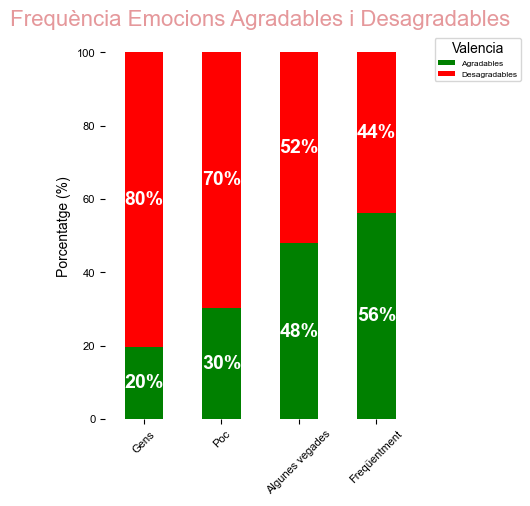

In [19]:
# Obtener las columnas del DataFrame como tuplas
columnas_flat = SEJ_conciencia_sentir_p1.columns.to_flat_index()

# Filtrar las columnas que corresponden a emociones agradables y negativas
columnas_agradables = [col for col in columnas_flat if col in emociones_agradables]
columnas_desagradables = [col for col in columnas_flat if col in emociones_desagradables]

# Contar las frecuencias para emociones agradables
conteo_agradables = SEJ_conciencia_sentir_p1[columnas_agradables].apply(pd.Series.value_counts)

# Contar las frecuencias para emociones negativas
conteo_negativas = SEJ_conciencia_sentir_p1[columnas_desagradables].apply(pd.Series.value_counts)

# Sumar los conteos para cada tipo de frecuencia en las emociones agradables
frecuencias_agradables_totales = conteo_agradables.sum(axis=1)

# Sumar los conteos para cada tipo de frecuencia en las emociones negativas
frecuencias_negativas_totales = conteo_negativas.sum(axis=1)

# Crear DataFrame de frecuencias
df_frecuencias = pd.DataFrame({
    'Agradables': frecuencias_agradables_totales,
    'Desagradables': frecuencias_negativas_totales
}).fillna(0)

# Reordenar las filas del DataFrame seg√∫n la secuencia deseada
secuencia_frecuencia_emociones = ['Gens', 'Poc', 'Algunes vegades', 'Freq√ºentment']
df_frecuencias = df_frecuencias.loc[secuencia_frecuencia_emociones]

# Convertir a porcentaje sobre el total de cada tipo de respuesta
df_frecuencias_perc = df_frecuencias.div(df_frecuencias.sum(axis=1), axis=0) * 100

# Crear gr√°fico de barras apiladas con porcentajes
fig, ax = plt.subplots(figsize=(4, 5)) # A4: figsize=(8.27, 11.69)
ax.set_frame_on(False)

# Graficar las barras apiladas
df_frecuencias_perc.plot(kind='bar', stacked=True, color=['green', 'red'], ax=ax)

# A√±adir etiquetas de porcentaje dentro de las barras
for i, (pos, neg) in enumerate(zip(df_frecuencias_perc['Agradables'], df_frecuencias_perc['Desagradables'])):
    ax.text(i, pos / 2, f'{pos:.0f}%', ha='center', va='center', color='white', fontweight='bold',fontsize=14,fontfamily='Arial')
    ax.text(i, pos + (neg / 2), f'{neg:.0f}%', ha='center', va='center', color='white', fontweight='bold',fontsize=14,fontfamily='Arial')

# A√±adir etiquetas y t√≠tulo
plt.title('Frequ√®ncia Emocions Agradables i Desagradables', fontsize=16, color="#D33F6A")
#plt.xlabel('Tipus de Resposta')
plt.ylabel('Porcentatge (%)')
plt.xticks(rotation=45)
ax.legend(title="Valencia", bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar gr√°fico
plt.show()

In [20]:
# Si se quiere guardar el gr√°fico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gr√°ficos') 
# Guardar como PDF
fig.savefig(f'{savePath}/freq√ºencia_emocions_agradables_desagradables.pdf', format='pdf', bbox_inches='tight')

### **Gr√°ficos de barras mostrando la distribuci√≥n de frecuencias de cada emoci√≥n por categoria**

In [21]:
# Contar las frecuencias para todas las emociones y tipos de respuesta
conteo_emociones = SEJ_conciencia_sentir_p1[emociones_totales].apply(pd.Series.value_counts)

# Filtrar las frecuencias de las categor√≠as de respuesta espec√≠ficas
conteo_emociones_filtrado = conteo_emociones.loc[secuencia_frecuencia_emociones]

# Convertir las frecuencias a porcentajes para cada categor√≠a (suma de cada categor√≠a = 100%)
porcentajes_por_categoria = conteo_emociones_filtrado.div(conteo_emociones_filtrado.sum(axis=1), axis=0) * 100
porcentajes_por_emocion = conteo_emociones_filtrado.div(conteo_emociones_filtrado.sum(axis=0), axis=1) * 100


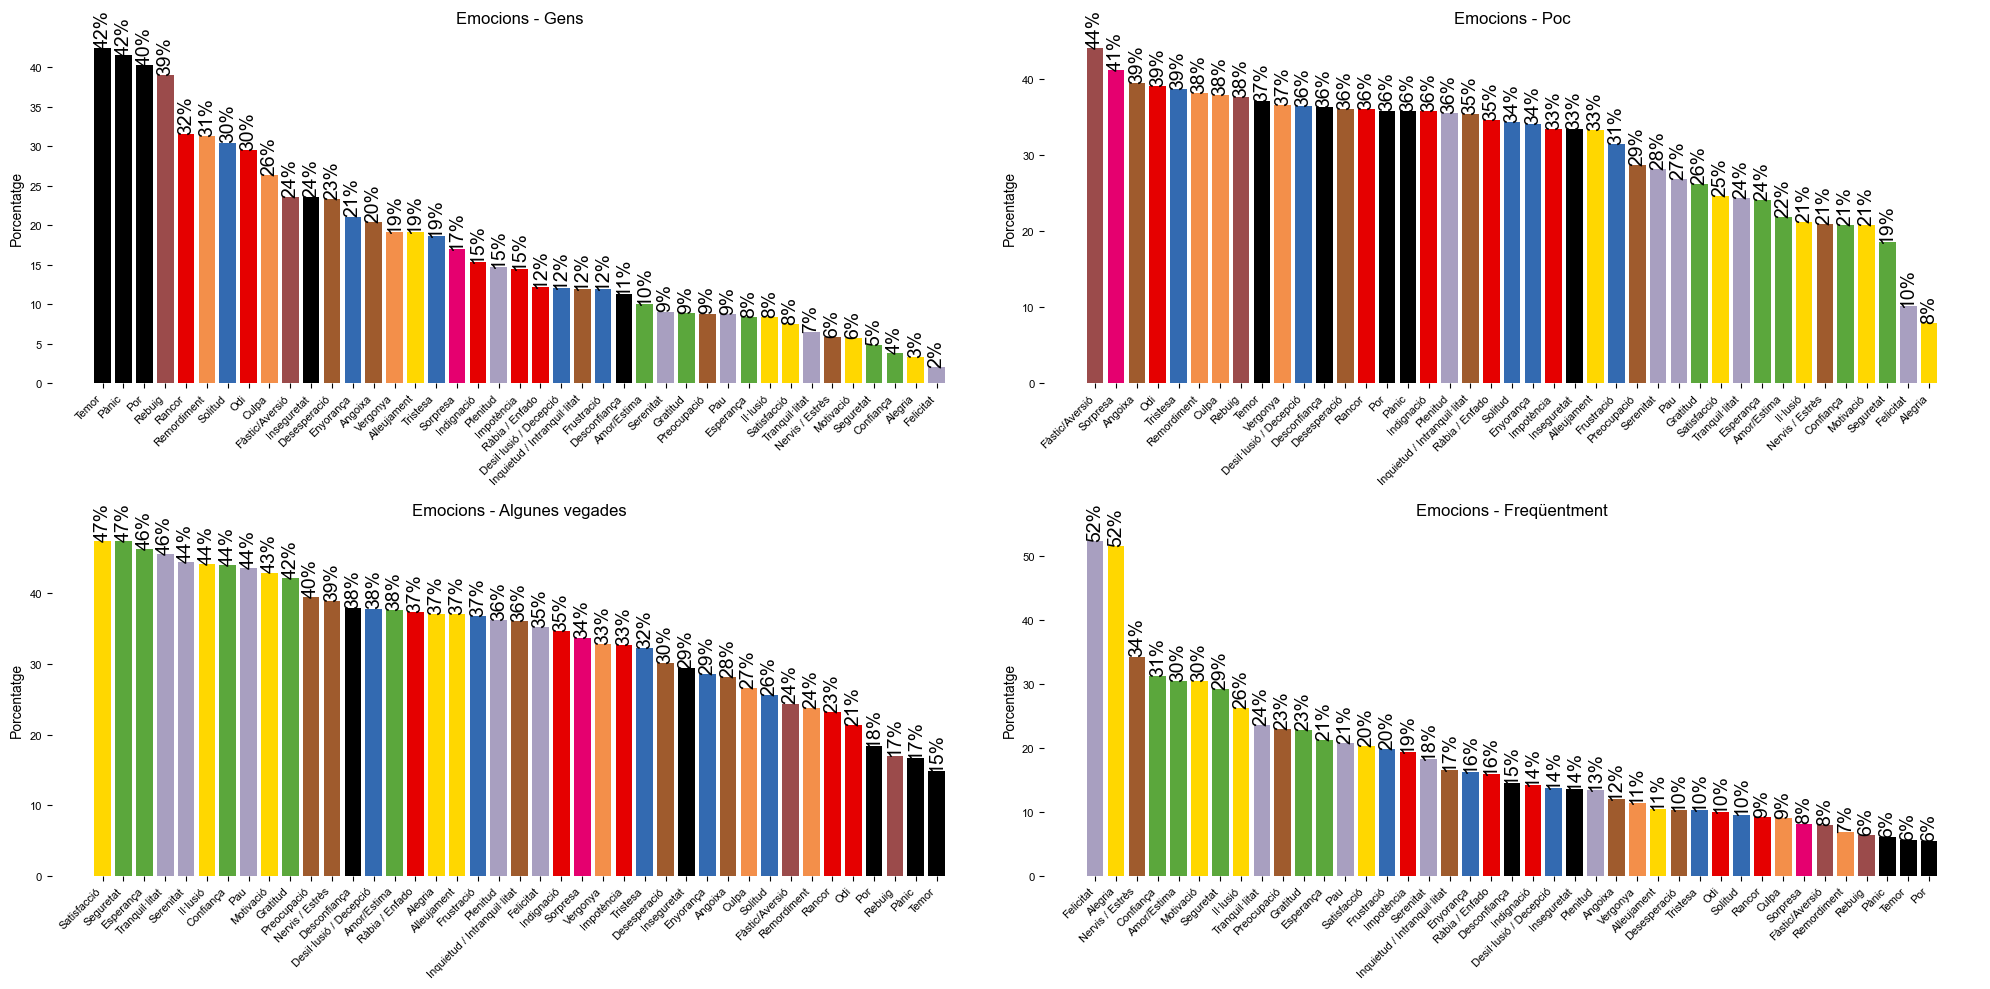

In [22]:
# Crear subgr√°ficos
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
axs = axs.flatten()  # Aplanar el arreglo de ejes para iterar f√°cilmente

for i, category in enumerate(porcentajes_por_emocion.index):
    # Ordenar los valores en orden descendente
    sorted_values = porcentajes_por_emocion.loc[category].sort_values(ascending=False)
    
    # Graficar con los colores del diccionario
    bars = axs[i].bar(sorted_values.index, sorted_values.values, 
                      color=[color_dict[emotion] for emotion in sorted_values.index])
    
    # Personalizar gr√°fico
    axs[i].set_title(f'Emocions - {category}')
    axs[i].set_ylabel('Porcentatge')
    
    # Establecer ticks y etiquetas
    axs[i].set_xticks(range(len(sorted_values.index)))  # Fijar posiciones de los ticks
    axs[i].set_xticklabels(sorted_values.index, rotation=45, ha='right')  # Etiquetas de los ticks

    # A√±adir porcentajes encima de las barras en vertical
    for bar in bars:
        height = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}%', 
                     ha='center', va='bottom', rotation=90,fontsize=14,fontfamily='Arial')  # Texto en vertical
        
    axs[i].set_frame_on(False) 

plt.tight_layout()  # Ajustar el espacio entre gr√°ficos
plt.show()


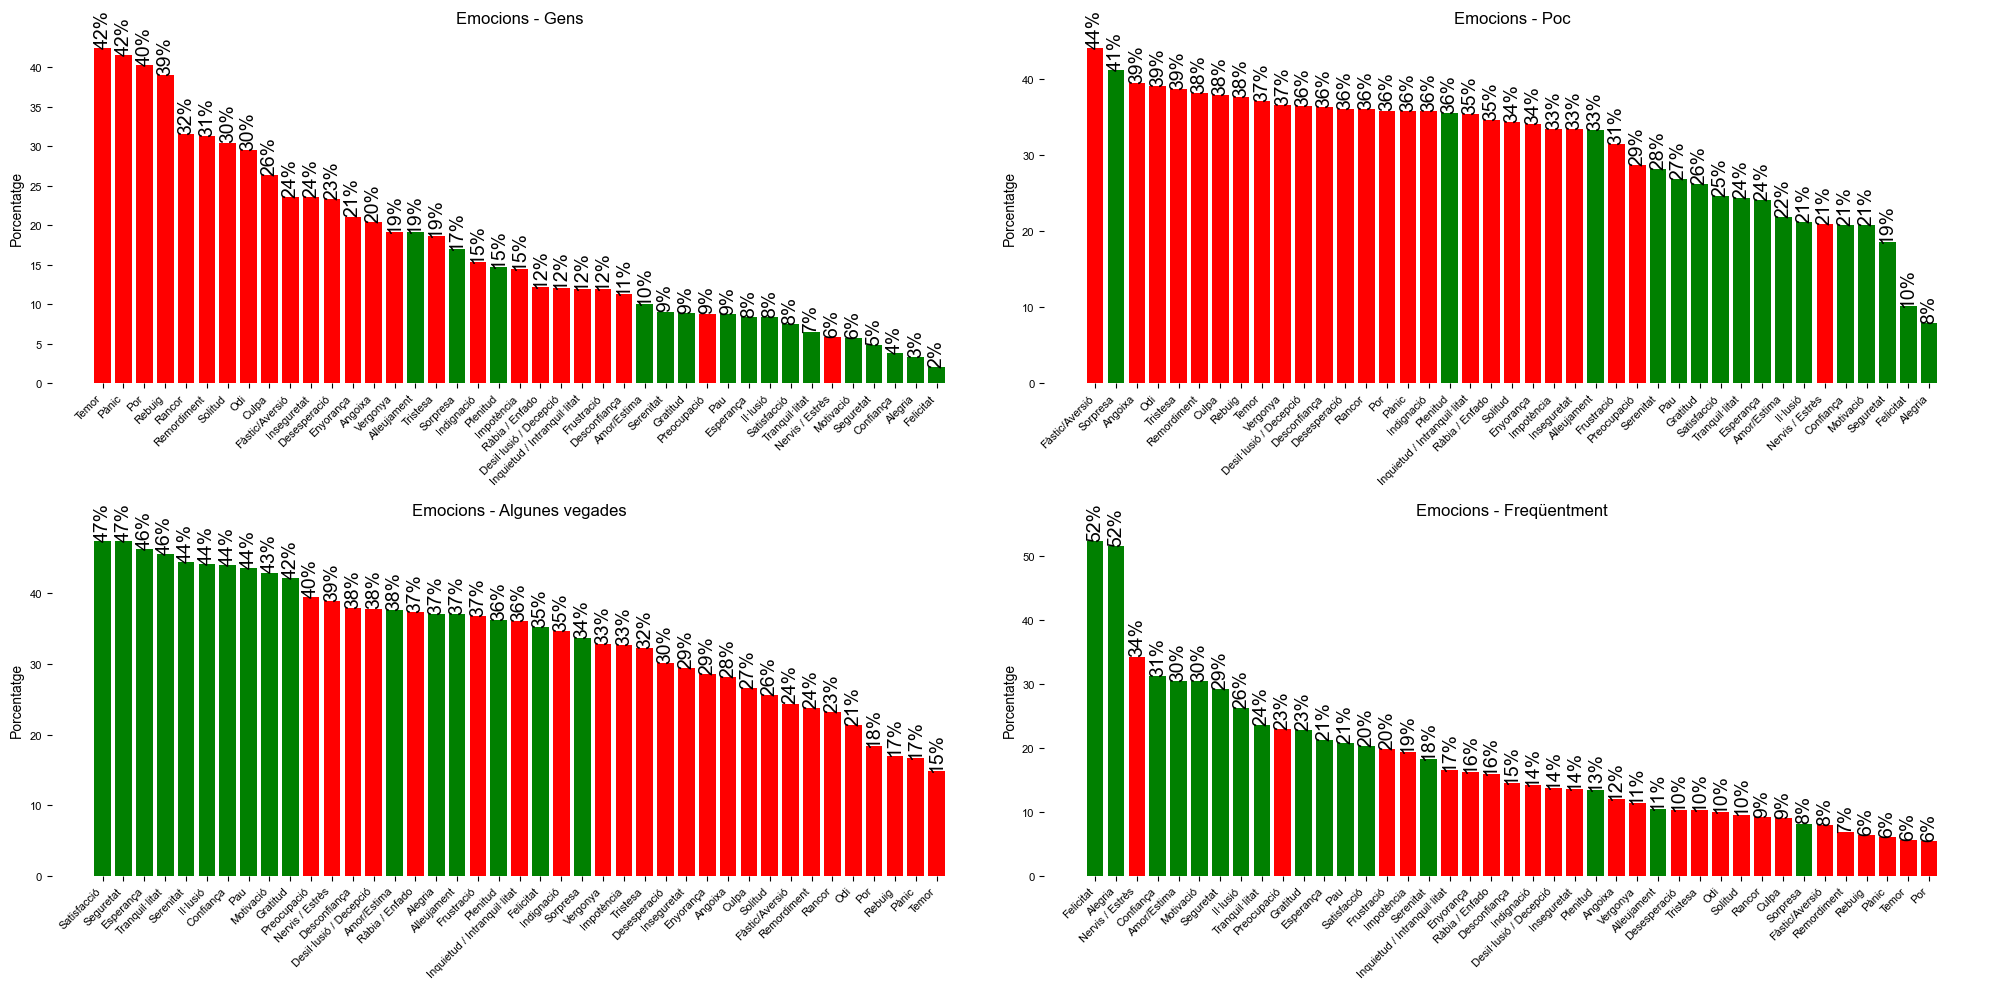

In [23]:
# Crear subgr√°ficos
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
axs = axs.flatten()  # Aplanar el arreglo de ejes para iterar f√°cilmente

for i, category in enumerate(porcentajes_por_emocion.index):
    # Ordenar los valores en orden descendente
    sorted_values = porcentajes_por_emocion.loc[category].sort_values(ascending=False)
    
    # Graficar con los colores seg√∫n emociones agradables/negativas
    bars = axs[i].bar(sorted_values.index, sorted_values.values, 
                      color=['green' if emotion in emociones_agradables else 'red' if emotion in emociones_desagradables else 'gray' 
                             for emotion in sorted_values.index])
    
    # Personalizar gr√°fico
    axs[i].set_title(f'Emocions - {category}')
    axs[i].set_ylabel('Porcentatge')
    
    # Establecer ticks y etiquetas
    axs[i].set_xticks(range(len(sorted_values.index)))  # Fijar posiciones de los ticks
    axs[i].set_xticklabels(sorted_values.index, rotation=45, ha='right')  # Etiquetas de los ticks

    # A√±adir porcentajes encima de las barras en vertical
    for bar in bars:
        height = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}%', 
                     ha='center', va='bottom', rotation=90, fontsize=14, fontfamily='Arial')  # Texto en vertical
        
    axs[i].set_frame_on(False) 

plt.tight_layout()  # Ajustar el espacio entre gr√°ficos
plt.show()

In [24]:
# Contar la frecuencia de cada emoci√≥n (columnas)
frecuencias_emociones = SEJ_conciencia_sentir_combined.sum()
total_participants = len(SEJ_conciencia_sentir_combined)

# Calcular los porcentajes
porcentajes_emociones = (frecuencias_emociones / total_participants) * 100

# Crear una lista de emociones ordenadas seg√∫n el diccionario de familias
emociones_ordenadas = []
for familia, emociones in families_emocions.items():
    emociones_ordenadas.extend(emociones)

# Filtrar y reordenar los porcentajes y colores seg√∫n emociones_ordenadas
porcentajes_ordenados = porcentajes_emociones[emociones_ordenadas]
colores_ordenados = [color_dict[emocion] for emocion in emociones_ordenadas]

# Crear un gr√°fico de barras
plt.figure(figsize=(14, 8))
porcentajes_ordenados.plot(kind='bar', color=colores_ordenados)

# A√±adir etiquetas y t√≠tulo
plt.title('Porcentaje de cada emoci√≥n respecto al total de participantes')
plt.xlabel('Emociones')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=90)

# Mostrar gr√°fico
plt.tight_layout()
plt.show()


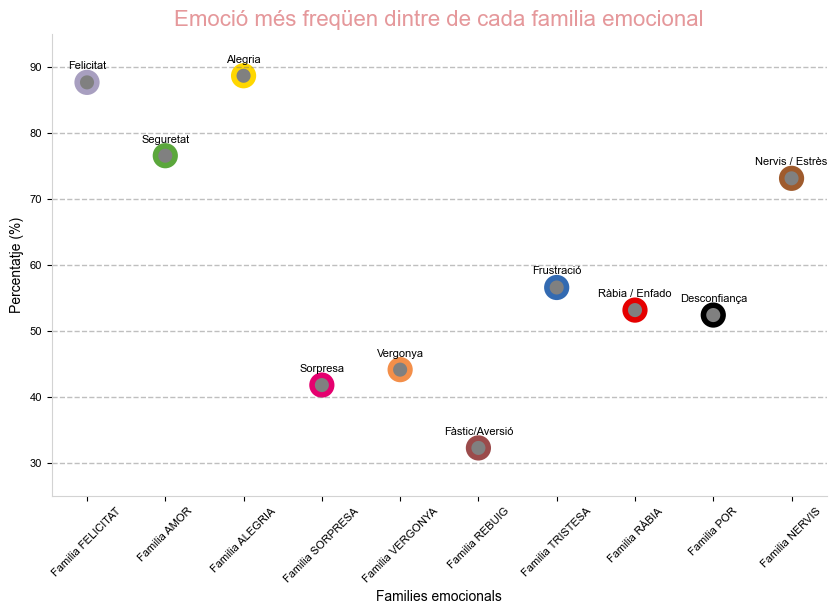

In [99]:
# Contar la frecuencia de cada emoci√≥n
frecuencias_emociones = SEJ_conciencia_sentir_combined.sum()
total_participants = len(SEJ_conciencia_sentir_combined)

# Calcular los porcentajes
porcentajes_emociones = (frecuencias_emociones / total_participants) * 100

# Encontrar la emoci√≥n con mayor porcentaje dentro de cada familia emocional
max_emociones_por_familia = {}
for familia, emociones in families_emocions.items():
    # Filtrar las emociones dentro de esta familia
    porcentajes_familia = porcentajes_emociones[emociones]
    
    # Seleccionar la emoci√≥n con el mayor porcentaje
    emocion_max = porcentajes_familia.idxmax()
    porcentaje_max = porcentajes_familia.max()
    
    # Guardar la emoci√≥n y su porcentaje
    max_emociones_por_familia[familia] = (emocion_max, porcentaje_max)

# Extraer datos para graficar
familias = list(max_emociones_por_familia.keys())
emociones_max = [max_emociones_por_familia[fam][0] for fam in familias]
porcentajes_max = [max_emociones_por_familia[fam][1] for fam in familias]
colores = [color_dict[emocion] for emocion in emociones_max]

# Crear la figura y los ejes con un handle "fig"
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el scatter plot (c√≠rculos) con bordes m√°s gruesos
ax.scatter(familias, porcentajes_max, s=200, c='grey', alpha=1, edgecolors=colores, linewidth=4)

# A√±adir etiquetas con los nombres de las emociones sobre los c√≠rculos
for i, emocion in enumerate(emociones_max):
    ax.text(familias[i], porcentajes_max[i] + 2, emocion, ha='center', fontsize=8)

# Configurar etiquetas y t√≠tulo
ax.set_title('Emoci√≥ m√©s freq√ºen dintre de cada familia emocional', fontsize=16, color="#D33F6A")
ax.set_xlabel('Families emocionals')
ax.set_ylabel('Percentatje (%)')
ax.set_xticks(range(len(familias)))
ax.set_xticklabels(familias, rotation=45)

# Mejorar la est√©tica del gr√°fico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")
#ax.grid(axis='y', linestyle='dashed', alpha=0.5)
ax.set_ylim(25, 95)
for y in ax.get_yticks():
    ax.axhline(y=y, color='gray', linestyle='dashed', alpha=0.5, linewidth=1)

# Mostrar gr√°fico
plt.show()



### Comparaci√≥n SEJ21 y SEJ24

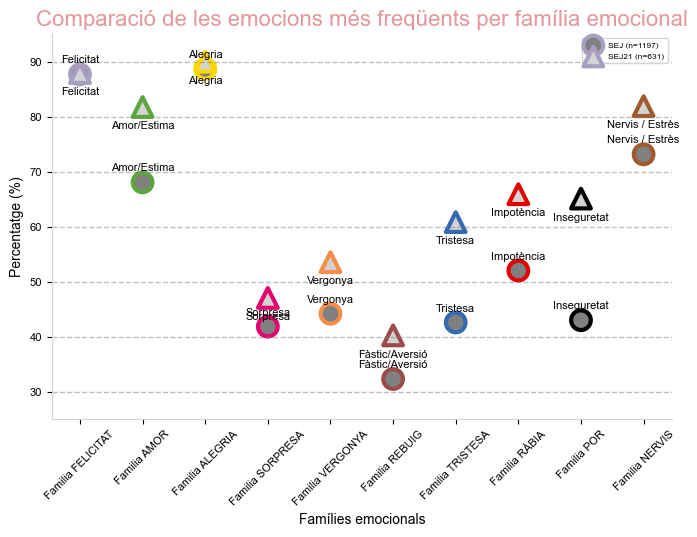

In [107]:
import matplotlib.pyplot as plt

# Comptar la freq√º√®ncia de cada emoci√≥ en SEJ21
freq_emocions_SEJ21 = SEJ21_conciencia_sentir_combined.sum()
percentatges_SEJ21 = (freq_emocions_SEJ21 / len(SEJ21_conciencia_sentir_combined)) * 100

# Trobar l‚Äôemoci√≥ m√©s freq√ºent dins de cada fam√≠lia en SEJ21
emocions_SEJ21 = {}
percentatges_max_SEJ21 = {}

for familia, emocions in families_emocions.items():
    emocion_max = percentatges_SEJ21[emocions].idxmax()  # Emoci√≥ m√©s freq√ºent dins la fam√≠lia en SEJ21
    percentatge_max = percentatges_SEJ21[emocion_max]
    
    emocions_SEJ21[familia] = emocion_max
    percentatges_max_SEJ21[familia] = percentatge_max

# Ara, mirem aquestes mateixes emocions a SEJ
freq_emocions_SEJ = SEJ_conciencia_sentir_combined.sum()
percentatges_SEJ = (freq_emocions_SEJ / len(SEJ_conciencia_sentir_combined)) * 100

percentatges_max_SEJ = {fam: percentatges_SEJ[emocions_SEJ21[fam]] for fam in families_emocions}

# Extreure dades per a la gr√†fica
families = list(emocions_SEJ21.keys())

# Obtenir els valors per a cada dataset
emocions = [emocions_SEJ21[fam] for fam in families]
percentatges_SEJ = [percentatges_max_SEJ[fam] for fam in families]
percentatges_SEJ21 = [percentatges_max_SEJ21[fam] for fam in families]

# Colors de les vores segons l‚Äôemoci√≥
colors = [color_dict[emocion] for emocion in emocions]

# Crear la figura i els eixos
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter plot per a SEJ_conciencia_sentir_combined (cercles)
ax.scatter(families, percentatges_SEJ, s=200, c='grey', edgecolors=colors, linewidth=3, marker='o', label=f"SEJ (n={len(SEJ_conciencia_sentir_combined)})")

# Scatter plot per a SEJ21_conciencia_sentir_combined (triangles)
ax.scatter(families, percentatges_SEJ21, s=200, c='lightgrey', edgecolors=colors, linewidth=3, marker='^', label=f"SEJ21 (n={len(SEJ21_conciencia_sentir_combined)})")

# Afegir etiquetes amb els noms de les emocions
for i in range(len(families)):
    ax.text(families[i], percentatges_SEJ[i] + 2, emocions[i], ha='center', fontsize=8, color='black')
    ax.text(families[i], percentatges_SEJ21[i] - 4, emocions[i], ha='center', fontsize=8, color='black')

# Configurar etiquetes i t√≠tol
ax.set_title('Comparaci√≥ de les emocions m√©s freq√ºents per fam√≠lia emocional', fontsize=16, color="#D33F6A")
ax.set_xlabel('Fam√≠lies emocionals')
ax.set_ylabel('Joves (%)')
ax.set_xticks(range(len(families)))
ax.set_xticklabels(families, rotation=45)

# Millorar l'est√®tica del gr√†fic
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")
ax.set_ylim(25, 95)
for y in ax.get_yticks():
    ax.axhline(y=y, color='gray', linestyle='dashed', alpha=0.5, linewidth=1)

# Afegir llegenda
ax.legend()

# Mostrar gr√†fic
plt.show()


In [108]:
# Si se quiere guardar el gr√°fico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gr√°ficos') 
# Guardar como PDF en tama√±o 
fig.savefig(f'{savePath}/SEJ21_SEJ24_frequencia_families_emocions.pdf', format='pdf', bbox_inches='tight')

In [105]:
# FILTRAR ELS DATAFRAMES PRIMER
primer_cicle_data = SEJ_conciencia_sentir_combined.loc[primer_cicle_ESO_idx]
SEJ21_primer_cicle_data = SEJ21_conciencia_sentir_combined.loc[SEJ21_primer_cicle_ESO_idx]

# Comptar la freq√º√®ncia de cada emoci√≥ en SEJ21 (filtrat)
freq_emocions_SEJ21 = SEJ21_primer_cicle_data.sum()
percentatges_SEJ21 = (freq_emocions_SEJ21 / len(SEJ21_primer_cicle_data)) * 100

# Trobar l‚Äôemoci√≥ m√©s freq√ºent dins de cada fam√≠lia en SEJ21
emocions_SEJ21 = {}
percentatges_max_SEJ21 = {}

for familia, emocions in families_emocions.items():
    emocion_max = percentatges_SEJ21[emocions].idxmax()  # Emoci√≥ m√©s freq√ºent dins la fam√≠lia en SEJ21
    percentatge_max = percentatges_SEJ21[emocion_max]
    
    emocions_SEJ21[familia] = emocion_max
    percentatges_max_SEJ21[familia] = percentatge_max

# Ara, mirem aquestes mateixes emocions a SEJ (filtrat)
freq_emocions_SEJ = primer_cicle_data.sum()
percentatges_SEJ = (freq_emocions_SEJ / len(primer_cicle_data)) * 100

percentatges_max_SEJ = {fam: percentatges_SEJ[emocions_SEJ21[fam]] for fam in families_emocions}

# Extreure dades per a la gr√†fica
families = list(emocions_SEJ21.keys())

# Obtenir els valors per a cada dataset
emocions = [emocions_SEJ21[fam] for fam in families]
percentatges_SEJ = [percentatges_max_SEJ[fam] for fam in families]
percentatges_SEJ21 = [percentatges_max_SEJ21[fam] for fam in families]

# Colors de les vores segons l‚Äôemoci√≥
colors = [color_dict[emocion] for emocion in emocions]

# Crear la figura i els eixos
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter plot per a SEJ_conciencia_sentir_combined (cercles)
ax.scatter(families, percentatges_SEJ, s=200, c='grey', edgecolors=colors, linewidth=3, marker='o', label=f"SEJ (n={len(primer_cicle_data)})")

# Scatter plot per a SEJ21_conciencia_sentir_combined (triangles)
ax.scatter(families, percentatges_SEJ21, s=200, c='lightgrey', edgecolors=colors, linewidth=3, marker='^', label=f"SEJ21 (n={len(SEJ21_primer_cicle_data)})")

# Afegir etiquetes amb els noms de les emocions
for i in range(len(families)):
    ax.text(families[i], percentatges_SEJ[i] + 2, emocions[i], ha='center', fontsize=8, color='black')
    ax.text(families[i], percentatges_SEJ21[i] - 4, emocions[i], ha='center', fontsize=8, color='black')

# Configurar etiquetes i t√≠tol
ax.set_title('Comparaci√≥ de les emocions m√©s freq√ºents per fam√≠lia emocional', fontsize=16, color="#D33F6A")
ax.set_xlabel('Fam√≠lies emocionals')
ax.set_ylabel('Joves (%)')
ax.set_xticks(range(len(families)))
ax.set_xticklabels(families, rotation=45)

# Millorar l'est√®tica del gr√†fic
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")
ax.set_ylim(20, 95)

# Afegir l√≠nies horitzontals en els ticks del Y
for y in ax.get_yticks():
    ax.axhline(y=y, color='gray', linestyle='dashed', alpha=0.5, linewidth=1)

# Afegir llegenda
# A√±adir leyenda
ax.legend([
    f"SEJ24: 1r Cicle ESO (n={len(primer_cicle_data)})",
    f"SEJ21: 1r Cicle ESO (n={len(SEJ21_primer_cicle_data)})"
])

# Mostrar gr√†fic
plt.show()


In [106]:
# Si se quiere guardar el gr√°fico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gr√°ficos') 
# Guardar como PDF en tama√±o 
fig.savefig(f'{savePath}/SEJ21_SEJ24_1er_cicle_ESO_frequencia_families_emocions.pdf', format='pdf', bbox_inches='tight')

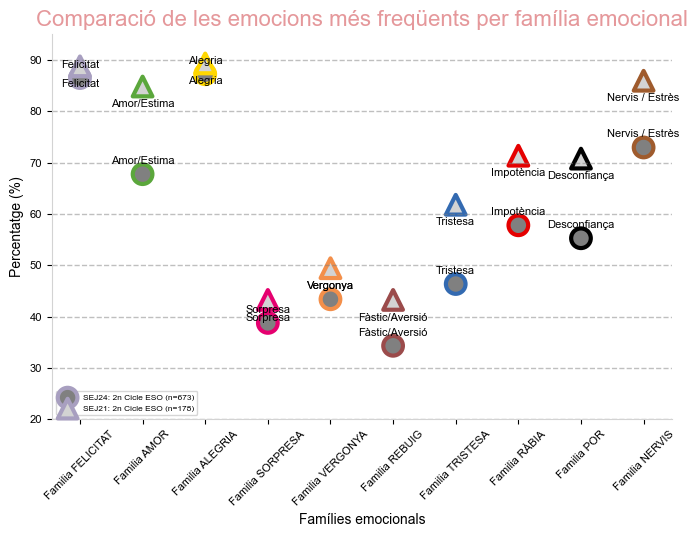

In [109]:
# FILTRAR ELS DATAFRAMES PRIMER
segon_cicle_data = SEJ_conciencia_sentir_combined.loc[segon_cicle_ESO_idx]
SEJ21_segon_cicle_data = SEJ21_conciencia_sentir_combined.loc[SEJ21_segon_cicle_ESO_idx]

# Comptar la freq√º√®ncia de cada emoci√≥ en SEJ21 (filtrat)
freq_emocions_SEJ21 = SEJ21_segon_cicle_data.sum()
percentatges_SEJ21 = (freq_emocions_SEJ21 / len(SEJ21_segon_cicle_data)) * 100

# Trobar l‚Äôemoci√≥ m√©s freq√ºent dins de cada fam√≠lia en SEJ21
emocions_SEJ21 = {}
percentatges_max_SEJ21 = {}

for familia, emocions in families_emocions.items():
    emocion_max = percentatges_SEJ21[emocions].idxmax()  # Emoci√≥ m√©s freq√ºent dins la fam√≠lia en SEJ21
    percentatge_max = percentatges_SEJ21[emocion_max]
    
    emocions_SEJ21[familia] = emocion_max
    percentatges_max_SEJ21[familia] = percentatge_max

# Ara, mirem aquestes mateixes emocions a SEJ (filtrat)
freq_emocions_SEJ = segon_cicle_data.sum()
percentatges_SEJ = (freq_emocions_SEJ / len(segon_cicle_data)) * 100

percentatges_max_SEJ = {fam: percentatges_SEJ[emocions_SEJ21[fam]] for fam in families_emocions}

# Extreure dades per a la gr√†fica
families = list(emocions_SEJ21.keys())

# Obtenir els valors per a cada dataset
emocions = [emocions_SEJ21[fam] for fam in families]
percentatges_SEJ = [percentatges_max_SEJ[fam] for fam in families]
percentatges_SEJ21 = [percentatges_max_SEJ21[fam] for fam in families]

# Colors de les vores segons l‚Äôemoci√≥
colors = [color_dict[emocion] for emocion in emocions]

# Crear la figura i els eixos
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter plot per a SEJ_conciencia_sentir_combined (cercles)
ax.scatter(families, percentatges_SEJ, s=200, c='grey', edgecolors=colors, linewidth=3, marker='o', label=f"SEJ (n={len(segon_cicle_data)})")

# Scatter plot per a SEJ21_conciencia_sentir_combined (triangles)
ax.scatter(families, percentatges_SEJ21, s=200, c='lightgrey', edgecolors=colors, linewidth=3, marker='^', label=f"SEJ21 (n={len(SEJ21_segon_cicle_data)})")

# Afegir etiquetes amb els noms de les emocions
for i in range(len(families)):
    ax.text(families[i], percentatges_SEJ[i] + 2, emocions[i], ha='center', fontsize=8, color='black')
    ax.text(families[i], percentatges_SEJ21[i] - 4, emocions[i], ha='center', fontsize=8, color='black')

# Configurar etiquetes i t√≠tol
ax.set_title('Comparaci√≥ de les emocions m√©s freq√ºents per fam√≠lia emocional', fontsize=16, color="#D33F6A")
ax.set_xlabel('Fam√≠lies emocionals')
ax.set_ylabel('Joves (%)')
ax.set_xticks(range(len(families)))
ax.set_xticklabels(families, rotation=45)

# Millorar l'est√®tica del gr√†fic
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")
ax.set_ylim(20, 95)

# Afegir l√≠nies horitzontals en els ticks del Y
for y in ax.get_yticks():
    ax.axhline(y=y, color='gray', linestyle='dashed', alpha=0.5, linewidth=1)

# Afegir llegenda
# A√±adir leyenda
ax.legend([
    f"SEJ24: 2n Cicle ESO (n={len(segon_cicle_data)})",
    f"SEJ21: 2n Cicle ESO (n={len(SEJ21_segon_cicle_data)})"
])

# Mostrar gr√†fic
plt.show()

In [110]:
# Si se quiere guardar el gr√°fico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gr√°ficos') 
# Guardar como PDF en tama√±o 
fig.savefig(f'{savePath}/SEJ21_SEJ24_2n_cicle_ESO_frequencia_families_emocions.pdf', format='pdf', bbox_inches='tight')

In [112]:
# FILTRAR ELS DATAFRAMES PRIMER
batxillerat_data = SEJ_conciencia_sentir_combined.loc[batxillerat_idx]
SEJ21_batxillerat_data = SEJ21_conciencia_sentir_combined.loc[SEJ21_batxillerat_idx]

# Comptar la freq√º√®ncia de cada emoci√≥ en SEJ21 (filtrat)
freq_emocions_SEJ21 = SEJ21_batxillerat_data.sum()
percentatges_SEJ21 = (freq_emocions_SEJ21 / len(SEJ21_batxillerat_data)) * 100

# Trobar l‚Äôemoci√≥ m√©s freq√ºent dins de cada fam√≠lia en SEJ21
emocions_SEJ21 = {}
percentatges_max_SEJ21 = {}

for familia, emocions in families_emocions.items():
    emocion_max = percentatges_SEJ21[emocions].idxmax()  # Emoci√≥ m√©s freq√ºent dins la fam√≠lia en SEJ21
    percentatge_max = percentatges_SEJ21[emocion_max]
    
    emocions_SEJ21[familia] = emocion_max
    percentatges_max_SEJ21[familia] = percentatge_max

# Ara, mirem aquestes mateixes emocions a SEJ (filtrat)
freq_emocions_SEJ = batxillerat_data.sum()
percentatges_SEJ = (freq_emocions_SEJ / len(batxillerat_data)) * 100

percentatges_max_SEJ = {fam: percentatges_SEJ[emocions_SEJ21[fam]] for fam in families_emocions}

# Extreure dades per a la gr√†fica
families = list(emocions_SEJ21.keys())

# Obtenir els valors per a cada dataset
emocions = [emocions_SEJ21[fam] for fam in families]
percentatges_SEJ = [percentatges_max_SEJ[fam] for fam in families]
percentatges_SEJ21 = [percentatges_max_SEJ21[fam] for fam in families]

# Colors de les vores segons l‚Äôemoci√≥
colors = [color_dict[emocion] for emocion in emocions]

# Crear la figura i els eixos
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter plot per a SEJ_conciencia_sentir_combined (cercles)
ax.scatter(families, percentatges_SEJ, s=200, c='grey', edgecolors=colors, linewidth=3, marker='o', label=f"SEJ (n={len(batxillerat_data)})")

# Scatter plot per a SEJ21_conciencia_sentir_combined (triangles)
ax.scatter(families, percentatges_SEJ21, s=200, c='lightgrey', edgecolors=colors, linewidth=3, marker='^', label=f"SEJ21 (n={len(SEJ21_batxillerat_data)})")

# Afegir etiquetes amb els noms de les emocions
for i in range(len(families)):
    ax.text(families[i], percentatges_SEJ[i] + 2, emocions[i], ha='center', fontsize=8, color='black')
    ax.text(families[i], percentatges_SEJ21[i] - 4, emocions[i], ha='center', fontsize=8, color='black')

# Configurar etiquetes i t√≠tol
ax.set_title('Comparaci√≥ de les emocions m√©s freq√ºents per fam√≠lia emocional', fontsize=16, color="#D33F6A")
ax.set_xlabel('Fam√≠lies emocionals')
ax.set_ylabel('Joves (%)')
ax.set_xticks(range(len(families)))
ax.set_xticklabels(families, rotation=45)

# Millorar l'est√®tica del gr√†fic
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")
ax.set_ylim(20, 95)

# Afegir l√≠nies horitzontals en els ticks del Y
for y in ax.get_yticks():
    ax.axhline(y=y, color='gray', linestyle='dashed', alpha=0.5, linewidth=1)

# Afegir llegenda
# A√±adir leyenda
ax.legend([
    f"SEJ24: Batxillerat (n={len(batxillerat_data)})",
    f"SEJ21: Batxillerat (n={len(SEJ21_batxillerat_data)})"
])

# Mostrar gr√†fic
plt.show()

In [113]:
# Si se quiere guardar el gr√°fico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gr√°ficos') 
# Guardar como PDF en tama√±o 
fig.savefig(f'{savePath}/SEJ21_SEJ24_batxillerat_frequencia_families_emocions.pdf', format='pdf', bbox_inches='tight')

### Comparaci√≥n grupos en SEJ24

In [70]:
import matplotlib.pyplot as plt


# Filtrar les dades per als tres grups
primer_cicle_data = SEJ_conciencia_sentir_combined.loc[primer_cicle_ESO_idx]
segon_cicle_data = SEJ_conciencia_sentir_combined.loc[segon_cicle_ESO_idx]
educacio_no_obligatoria_data = SEJ_conciencia_sentir_combined.loc[educaci√≥_no_obligatoria_idx]

# Comptar la freq√º√®ncia de cada emoci√≥ en cada grup
frequencies_primer = primer_cicle_data.sum()
frequencies_segon = segon_cicle_data.sum()
frequencies_educacio = educacio_no_obligatoria_data.sum()

# Calcular els percentatges en cada grup
percentatges_primer = (frequencies_primer / len(primer_cicle_data)) * 100
percentatges_segon = (frequencies_segon / len(segon_cicle_data)) * 100
percentatges_educacio = (frequencies_educacio / len(educacio_no_obligatoria_data)) * 100

# Trobar l‚Äôemoci√≥ amb el percentatge m√©s alt dins de cada fam√≠lia emocional per a cada grup
max_emocions_primer = {}
max_emocions_segon = {}
max_emocions_educacio = {}

for familia, emocions in families_emocions.items():
    max_emocions_primer[familia] = (percentatges_primer[emocions].idxmax(), percentatges_primer[emocions].max())
    max_emocions_segon[familia] = (percentatges_segon[emocions].idxmax(), percentatges_segon[emocions].max())
    max_emocions_educacio[familia] = (percentatges_educacio[emocions].idxmax(), percentatges_educacio[emocions].max())

# Extreure dades per a la gr√†fica
families = list(max_emocions_primer.keys())

emocions_primer = [max_emocions_primer[fam][0] for fam in families]
percentatges_primer = [max_emocions_primer[fam][1] for fam in families]

emocions_segon = [max_emocions_segon[fam][0] for fam in families]
percentatges_segon = [max_emocions_segon[fam][1] for fam in families]

emocions_educacio = [max_emocions_educacio[fam][0] for fam in families]
percentatges_educacio = [max_emocions_educacio[fam][1] for fam in families]

# Colors de les vores segons l‚Äôemoci√≥
colors_primer = [color_dict[emocion] for emocion in emocions_primer]
colors_segon = [color_dict[emocion] for emocion in emocions_segon]
colors_educacio = [color_dict[emocion] for emocion in emocions_educacio]

# Crear la figura i els eixos
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter plot per a cada grup amb formes diferents
ax.scatter(families, percentatges_primer, s=100, c='gray', edgecolors=colors_primer, linewidth=3, marker='o', label="1r Cicle ESO")
ax.scatter(families, percentatges_segon, s=100, c='gray', edgecolors=colors_segon, linewidth=3, marker='^', label="2n Cicle ESO")
ax.scatter(families, percentatges_educacio, s=100, c='gray', edgecolors=colors_educacio, linewidth=3, marker='s', label="Educaci√≥ No Obligat√≤ria")

# Afegir etiquetes amb els noms de les emocions
#for i in range(len(families)):
    #ax.text(families[i], percentatges_primer[i] + 2, emocions_primer[i], ha='center', fontsize=8, color='black')
    #ax.text(families[i], percentatges_segon[i] - 4, emocions_segon[i], ha='center', fontsize=8, color='black')
    #ax.text(families[i], percentatges_educacio[i] - 8, emocions_educacio[i], ha='center', fontsize=8, color='black')

# Configuraci√≥ d‚Äôetiquetes i t√≠tol
ax.set_title("Emoci√≥ m√©s freq√ºent dins de cada fam√≠lia emocional", fontsize=16, color="#D33F6A")
ax.set_xlabel("Fam√≠lies emocionals")
ax.set_ylabel("Joves (%)")
ax.set_xticks(range(len(families)))
ax.set_xticklabels(families, rotation=45)

# Millorar l'est√®tica del gr√†fic
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")
ax.set_ylim(20, 95)
for y in ax.get_yticks():
    ax.axhline(y=y, color='gray', linestyle='dashed', alpha=0.5, linewidth=1)

# Afegir llegenda
ax.legend([
    f"1r Cicle ESO (n={len(primer_cicle_data)})",
    f"2n Cicle ESO (n={len(segon_cicle_data)})",
    f"Educaci√≥ No Obligat√≤ria (n={len(educacio_no_obligatoria_data)})"
])
# Mostrar gr√†fic
plt.show()


In [115]:
# Si se quiere guardar el gr√°fico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gr√°ficos') 
# Guardar como PDF en tama√±o 
fig.savefig(f'{savePath}/1er_cicle_2nd_cicle_ESO_no_obligarotia_frequencia_families_emocions.pdf', format='pdf', bbox_inches='tight')

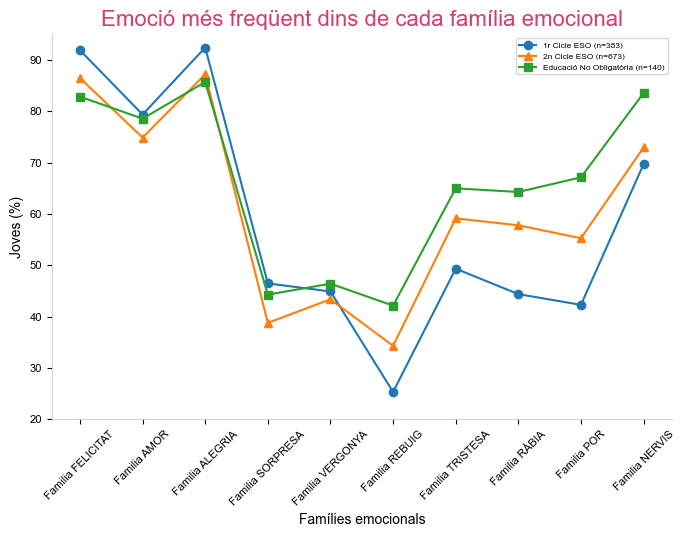

In [69]:
import matplotlib.pyplot as plt

# Filtrar les dades per als tres grups
primer_cicle_data = SEJ_conciencia_sentir_combined.loc[primer_cicle_ESO_idx]
segon_cicle_data = SEJ_conciencia_sentir_combined.loc[segon_cicle_ESO_idx]
educacio_no_obligatoria_data = SEJ_conciencia_sentir_combined.loc[educaci√≥_no_obligatoria_idx]

# Comptar la freq√º√®ncia de cada emoci√≥ en cada grup
frequencies_primer = primer_cicle_data.sum()
frequencies_segon = segon_cicle_data.sum()
frequencies_educacio = educacio_no_obligatoria_data.sum()

# Calcular els percentatges en cada grup
percentatges_primer = (frequencies_primer / len(primer_cicle_data)) * 100
percentatges_segon = (frequencies_segon / len(segon_cicle_data)) * 100
percentatges_educacio = (frequencies_educacio / len(educacio_no_obligatoria_data)) * 100

# Trobar l‚Äôemoci√≥ amb el percentatge m√©s alt dins de cada fam√≠lia emocional per a cada grup
max_emocions_primer = {}
max_emocions_segon = {}
max_emocions_educacio = {}

for familia, emocions in families_emocions.items():
    max_emocions_primer[familia] = (percentatges_primer[emocions].idxmax(), percentatges_primer[emocions].max())
    max_emocions_segon[familia] = (percentatges_segon[emocions].idxmax(), percentatges_segon[emocions].max())
    max_emocions_educacio[familia] = (percentatges_educacio[emocions].idxmax(), percentatges_educacio[emocions].max())

# Extreure dades per a la gr√†fica
families = list(max_emocions_primer.keys())

percentatges_primer = [max_emocions_primer[fam][1] for fam in families]
percentatges_segon = [max_emocions_segon[fam][1] for fam in families]
percentatges_educacio = [max_emocions_educacio[fam][1] for fam in families]

# Definir colors per a cada grup
color_primer = "#1f77b4"  # Blau
color_segon = "#ff7f0e"   # Taronja
color_educacio = "#2ca02c" # Verd

# Crear la figura i els eixos
fig, ax = plt.subplots(figsize=(8, 5))

# Dibuixar les l√≠nies per a cada grup
ax.plot(families, percentatges_primer, marker='o', linestyle='-', color=color_primer, label=f"1r Cicle ESO (n={len(primer_cicle_data)})")
ax.plot(families, percentatges_segon, marker='^', linestyle='-', color=color_segon, label=f"2n Cicle ESO (n={len(segon_cicle_data)})")
ax.plot(families, percentatges_educacio, marker='s', linestyle='-', color=color_educacio, label=f"Educaci√≥ No Obligat√≤ria (n={len(educacio_no_obligatoria_data)})")

# Configuraci√≥ d‚Äôetiquetes i t√≠tol
ax.set_title("Emoci√≥ m√©s freq√ºent dins de cada fam√≠lia emocional", fontsize=16, color="#D33F6A")
ax.set_xlabel("Fam√≠lies emocionals")
ax.set_ylabel("Joves (%)")
ax.set_xticks(range(len(families)))
ax.set_xticklabels(families, rotation=45)

# Millorar l'est√®tica del gr√†fic
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")
ax.set_ylim(20, 95)

# Afegir llegenda
ax.legend()

# Mostrar gr√†fic
plt.show()


In [60]:
# Si se quiere guardar el gr√°fico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gr√°ficos') 
# Guardar como PDF en tama√±o 
fig.savefig(f'{savePath}/1er_cicle_2nd_cicle_ESO_no_obligarotia_frequencia_families_emocions_lineas.pdf', format='pdf', bbox_inches='tight')

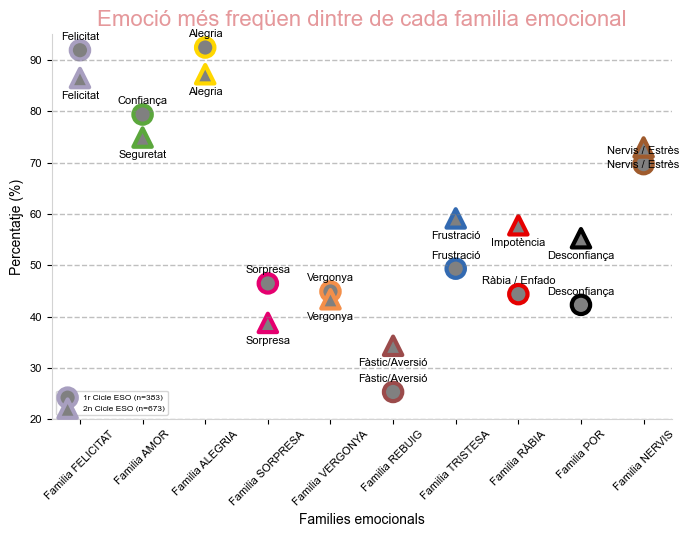

In [116]:
# Filtrar los datos para los dos grupos
primer_cicle_data = SEJ_conciencia_sentir_combined.loc[primer_cicle_ESO_idx]
segon_cicle_data = SEJ_conciencia_sentir_combined.loc[segon_cicle_ESO_idx]

# Contar la frecuencia de cada emoci√≥n en cada grupo
frecuencias_emociones_primer = primer_cicle_data.sum()
frecuencias_emociones_segon = segon_cicle_data.sum()

# Calcular los porcentajes en cada grupo
porcentajes_emociones_primer = (frecuencias_emociones_primer / len(primer_cicle_data)) * 100
porcentajes_emociones_segon = (frecuencias_emociones_segon / len(segon_cicle_data)) * 100

# Encontrar la emoci√≥n con mayor porcentaje dentro de cada familia emocional en cada grupo
max_emociones_por_familia_primer = {}
max_emociones_por_familia_segon = {}

for familia, emociones in families_emocions.items():
    # Seleccionar la emoci√≥n con el mayor porcentaje en cada grupo
    emocion_max_primer = porcentajes_emociones_primer[emociones].idxmax()
    porcentaje_max_primer = porcentajes_emociones_primer[emociones].max()
    
    emocion_max_segon = porcentajes_emociones_segon[emociones].idxmax()
    porcentaje_max_segon = porcentajes_emociones_segon[emociones].max()
    
    # Guardar en los diccionarios
    max_emociones_por_familia_primer[familia] = (emocion_max_primer, porcentaje_max_primer)
    max_emociones_por_familia_segon[familia] = (emocion_max_segon, porcentaje_max_segon)

# Extraer datos para graficar
familias = list(max_emociones_por_familia_primer.keys())

emociones_max_primer = [max_emociones_por_familia_primer[fam][0] for fam in familias]
porcentajes_max_primer = [max_emociones_por_familia_primer[fam][1] for fam in familias]

emociones_max_segon = [max_emociones_por_familia_segon[fam][0] for fam in familias]
porcentajes_max_segon = [max_emociones_por_familia_segon[fam][1] for fam in familias]

# Colores de bordes seg√∫n la emoci√≥n
colores_primer = [color_dict[emocion] for emocion in emociones_max_primer]
colores_segon = [color_dict[emocion] for emocion in emociones_max_segon]

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter plot para el primer ciclo (c√≠rculos)
ax.scatter(familias, porcentajes_max_primer, s=175, c='gray', edgecolors=colores_primer, linewidth=3, marker='o', label="1er Cicle ESO")

# Scatter plot para el segundo ciclo (tri√°ngulos)
ax.scatter(familias, porcentajes_max_segon, s=175, c='gray', edgecolors=colores_segon, linewidth=3, marker='^', label="2n Cicle ESO")

# A√±adir etiquetas con los nombres de las emociones
for i, (emocion1, emocion2) in enumerate(zip(emociones_max_primer, emociones_max_segon)):
    ax.text(familias[i], porcentajes_max_primer[i] + 2, emocion1, ha='center', fontsize=8, color='black')
    ax.text(familias[i], porcentajes_max_segon[i] - 4, emocion2, ha='center', fontsize=8, color='black')

# Configurar etiquetas y t√≠tulo
ax.set_title('Emoci√≥ m√©s freq√ºen dintre de cada familia emocional', fontsize=16, color="#D33F6A")
ax.set_xlabel('Families emocionals')
ax.set_ylabel('Percentatje (%)')
ax.set_xticks(range(len(familias)))
ax.set_xticklabels(familias, rotation=45)

# Mejorar la est√©tica del gr√°fico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")
ax.set_ylim(20, 95)
for y in ax.get_yticks():
    ax.axhline(y=y, color='gray', linestyle='dashed', alpha=0.5, linewidth=1)

# A√±adir leyenda
ax.legend([
    f"1r Cicle ESO (n={len(primer_cicle_data)})",
    f"2n Cicle ESO (n={len(segon_cicle_data)})"
])
# Mostrar gr√°fico
plt.show()



In [117]:
# Si se quiere guardar el gr√°fico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gr√°ficos') 
# Guardar como PDF en tama√±o A4
fig.savefig(f'{savePath}/1er_cicle_2nd_cicle_ESO_frequencia_families_emocions.pdf', format='pdf', bbox_inches='tight')

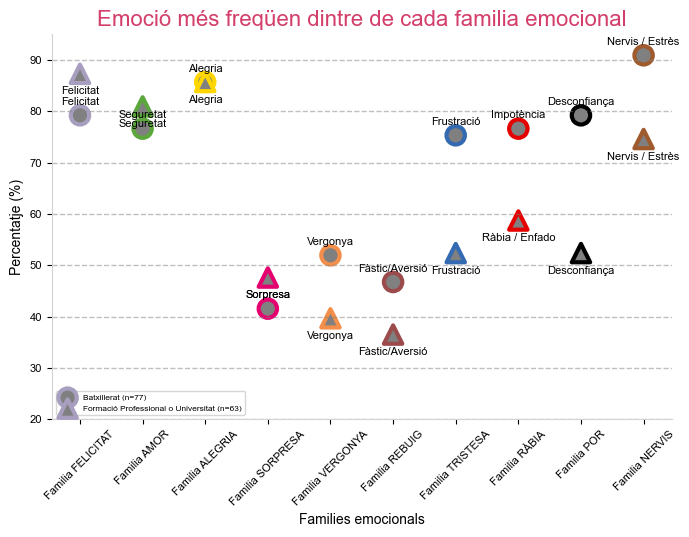

In [68]:
# Filtrar los datos para los dos grupos
batxillerat_data = SEJ_conciencia_sentir_combined.loc[batxillerat_idx]
fp_uni_data = SEJ_conciencia_sentir_combined.loc[fp_universitat_idx]

# Contar la frecuencia de cada emoci√≥n en cada grupo
frecuencias_emociones_primer = batxillerat_data.sum()
frecuencias_emociones_segon = fp_uni_data.sum()

# Calcular los porcentajes en cada grupo
porcentajes_emociones_primer = (frecuencias_emociones_primer / len(batxillerat_data)) * 100
porcentajes_emociones_segon = (frecuencias_emociones_segon / len(fp_uni_data)) * 100

# Encontrar la emoci√≥n con mayor porcentaje dentro de cada familia emocional en cada grupo
max_emociones_por_familia_primer = {}
max_emociones_por_familia_segon = {}

for familia, emociones in families_emocions.items():
    # Seleccionar la emoci√≥n con el mayor porcentaje en cada grupo
    emocion_max_primer = porcentajes_emociones_primer[emociones].idxmax()
    porcentaje_max_primer = porcentajes_emociones_primer[emociones].max()
    
    emocion_max_segon = porcentajes_emociones_segon[emociones].idxmax()
    porcentaje_max_segon = porcentajes_emociones_segon[emociones].max()
    
    # Guardar en los diccionarios
    max_emociones_por_familia_primer[familia] = (emocion_max_primer, porcentaje_max_primer)
    max_emociones_por_familia_segon[familia] = (emocion_max_segon, porcentaje_max_segon)

# Extraer datos para graficar
familias = list(max_emociones_por_familia_primer.keys())

emociones_max_primer = [max_emociones_por_familia_primer[fam][0] for fam in familias]
porcentajes_max_primer = [max_emociones_por_familia_primer[fam][1] for fam in familias]

emociones_max_segon = [max_emociones_por_familia_segon[fam][0] for fam in familias]
porcentajes_max_segon = [max_emociones_por_familia_segon[fam][1] for fam in familias]

# Colores de bordes seg√∫n la emoci√≥n
colores_primer = [color_dict[emocion] for emocion in emociones_max_primer]
colores_segon = [color_dict[emocion] for emocion in emociones_max_segon]

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 5))

# Scatter plot para el primer ciclo (c√≠rculos)
ax.scatter(familias, porcentajes_max_primer, s=175, c='gray', edgecolors=colores_primer, linewidth=3, marker='o', label="Batxillerat")

# Scatter plot para el segundo ciclo (tri√°ngulos)
ax.scatter(familias, porcentajes_max_segon, s=175, c='gray', edgecolors=colores_segon, linewidth=3, marker='^', label="Formaci√≥ Professional o Universitat")

# A√±adir etiquetas con los nombres de las emociones
for i, (emocion1, emocion2) in enumerate(zip(emociones_max_primer, emociones_max_segon)):
    ax.text(familias[i], porcentajes_max_primer[i] + 2, emocion1, ha='center', fontsize=8, color='black')
    ax.text(familias[i], porcentajes_max_segon[i] - 4, emocion2, ha='center', fontsize=8, color='black')

# Configurar etiquetas y t√≠tulo
ax.set_title('Emoci√≥ m√©s freq√ºen dintre de cada familia emocional', fontsize=16, color="#D33F6A")
ax.set_xlabel('Families emocionals')
ax.set_ylabel('Percentatje (%)')
ax.set_xticks(range(len(familias)))
ax.set_xticklabels(familias, rotation=45)

# Mejorar la est√©tica del gr√°fico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")
ax.set_ylim(20, 95)
for y in ax.get_yticks():
    ax.axhline(y=y, color='gray', linestyle='dashed', alpha=0.5, linewidth=1)

# A√±adir leyenda
ax.legend([
    f"Batxillerat (n={len(batxillerat_data)})",
    f"Formaci√≥ Professional o Universitat (n={len(fp_uni_data)})"
])

# Mostrar gr√°fico
plt.show()


In [119]:
# Si se quiere guardar el gr√°fico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gr√°ficos') 
# Guardar como PDF en tama√±o A4
fig.savefig(f'{savePath}/Batx_FP_o_uni_frequencia_families_emocions.pdf', format='pdf', bbox_inches='tight')

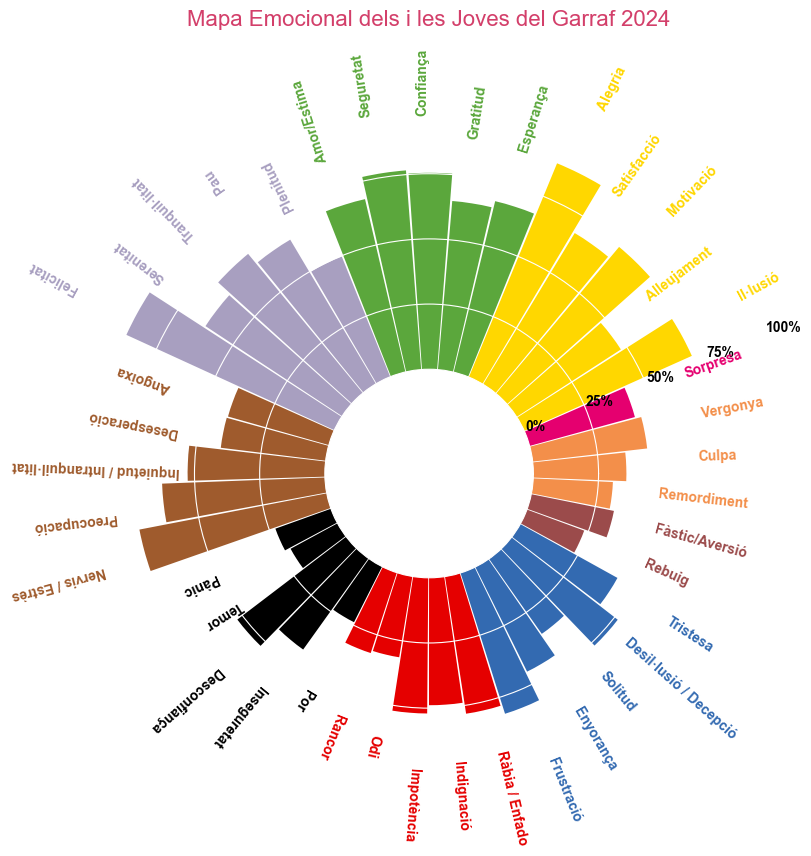

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Contar la frecuencia de cada emoci√≥n (columnas)
frecuencias_emociones = SEJ_conciencia_sentir_combined.sum()
total_participants = len(SEJ_conciencia_sentir_combined)

# Calcular los porcentajes
porcentajes_emociones = (frecuencias_emociones / total_participants) * 100

# Crear una lista de emociones ordenadas seg√∫n el diccionario de familias
emociones_ordenadas = []
for familia, emociones in families_emocions.items():
    emociones_ordenadas.extend(emociones)

# Invertir el orden de las emociones para obtener una disposici√≥n en espejo
emociones_ordenadas = emociones_ordenadas[::-1]

# Filtrar y reordenar los porcentajes y colores seg√∫n emociones_ordenadas
porcentajes_ordenados = porcentajes_emociones[emociones_ordenadas]
colores_ordenados = [color_dict[emocion] for emocion in emociones_ordenadas]

# N√∫mero de emociones
num_emociones = len(porcentajes_ordenados)

# √Ångulos para cada barra (giro 180 grados sumando pi radianes)
theta = np.linspace(0.0, 2 * np.pi, num_emociones, endpoint=False) + np.pi - np.pi/9 

# Ancho de cada barra con separaci√≥n
ancho_barra = (2 * np.pi / num_emociones) * 0.95  # Reducir el ancho de las barras al 95%

# Crear un gr√°fico polar
fig, ax = plt.subplots(figsize=(8.27, 11.69), subplot_kw={'projection': 'polar'})  # Tama√±o A4 (DINA4)

# Crear las barras con bottom=40
bars = ax.bar(theta, porcentajes_ordenados, width=ancho_barra, color=colores_ordenados, bottom=40)

# Ajustar el radio m√≠nimo y m√°ximo
ax.set_ylim(0, max(porcentajes_ordenados) + 40)

# Eliminar l√≠neas radiales
ax.spines['polar'].set_visible(False)
ax.grid(color='white', linestyle='-', linewidth=0.8)

# Definir los niveles circulares con la compensaci√≥n de bottom=40
circular_levels = [40, 40 + 25, 40 + 50, 40 + 75, 40 + 100]  # Se suman a 40
ax.set_yticks(circular_levels)
ax.set_yticklabels([f'{int(level - 40)}%' for level in circular_levels], color='black', fontsize=10, fontweight='bold')

# Escribir el nombre de cada emoci√≥n alineado con la barra
for bar, emocion, color, angle in zip(bars, emociones_ordenadas, colores_ordenados, theta):
    height = bar.get_height()
    angle += ancho_barra / 32  # Centrar el texto en la barra
    rotation = np.degrees(angle)

    # Ajustar la rotaci√≥n para que el texto sea legible
    ax.text(angle, height + 75, emocion, ha='center', va='bottom', 
            rotation=rotation, rotation_mode='anchor', color=color, fontsize=10, fontweight='bold')

# Estilizar el gr√°fico
ax.set_xticks([])  # Eliminar etiquetas de las emociones en el per√≠metro
ax.set_title('Mapa Emocional dels i les Joves del Garraf 2024', fontsize=16, color="#D33F6A", pad=60)

# Mostrar gr√°fico
plt.tight_layout()
plt.show()


In [121]:
# Si se quiere guardar el gr√°fico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gr√°ficos') 
# Guardar como PDF en tama√±o A4
fig.savefig(f'{savePath}/equalitzador_emocional_frequencia_families_emocions.pdf', format='pdf', bbox_inches='tight')

#### **A√±adir la frecuencia de emociones por etapa educativa**
Siguientes categorias:

- Primera etapa de la ESO
- Segunda etapa de la ESO
- Formaci√≥ educativa no obligatoria

#### **A√±adir la frecuencia de emociones por etapa postobligatorias**
Siguientes categorias:

- Batxillerat
- Formaci√≥ Profesinal o Universitat


### **Matriz de correlaci√≥n y dendograma con clustering hierarchico para mirar el grado de coorelaci√≥n (concordancia) entre emociones**

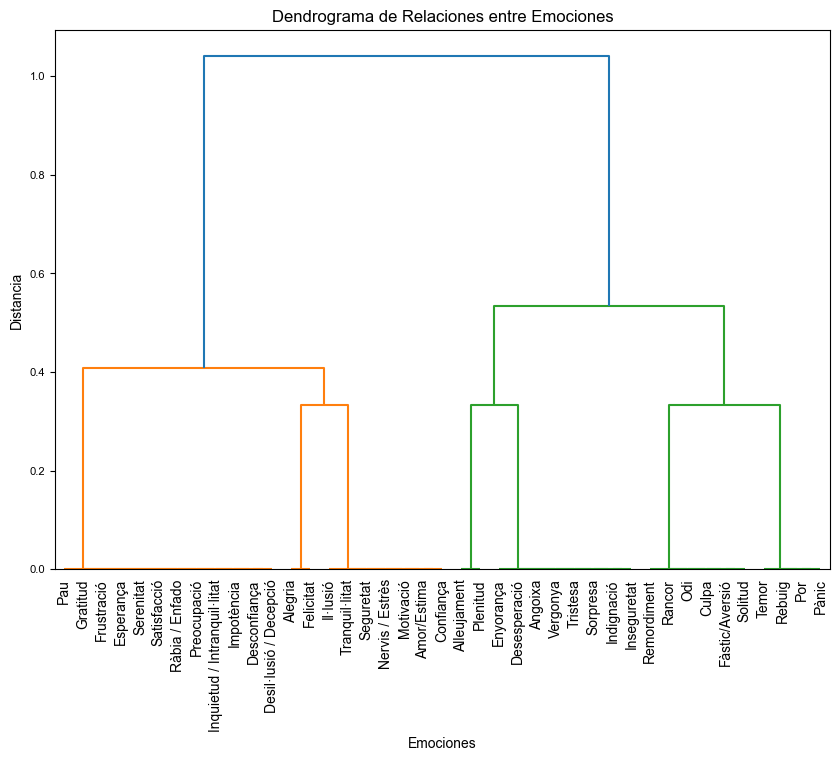

In [23]:
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd

# Calcular la matriz de correlaci√≥n de Kendall
kendall_corr = porcentajes_por_emocion.corr(method='kendall')
#kendall_corr = conteo_emociones_filtrado.corr(method='kendall')


# Convertir la matriz de correlaci√≥n en una matriz de distancias
distance_matrix = 1 - kendall_corr

# Convertir la matriz cuadrada de distancias en una matriz condensada
condensed_distance = ssd.squareform(distance_matrix)

# Realizar el clustering jer√°rquico usando la matriz de distancias condensada
linkage_matrix = sch.linkage(condensed_distance, method='average')

# Obtener el orden de los grupos desde el dendrograma
dendro_order = sch.leaves_list(linkage_matrix)

# Reordenar la matriz de correlaci√≥n
sorted_kendall_corr = kendall_corr.iloc[dendro_order, dendro_order]


# Dibujar el dendrograma
plt.figure(figsize=(10, 7))
dendro = sch.dendrogram(linkage_matrix, labels=kendall_corr.columns, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrograma de Relaciones entre Emociones')
plt.xlabel('Emociones')
plt.ylabel('Distancia')
plt.show()

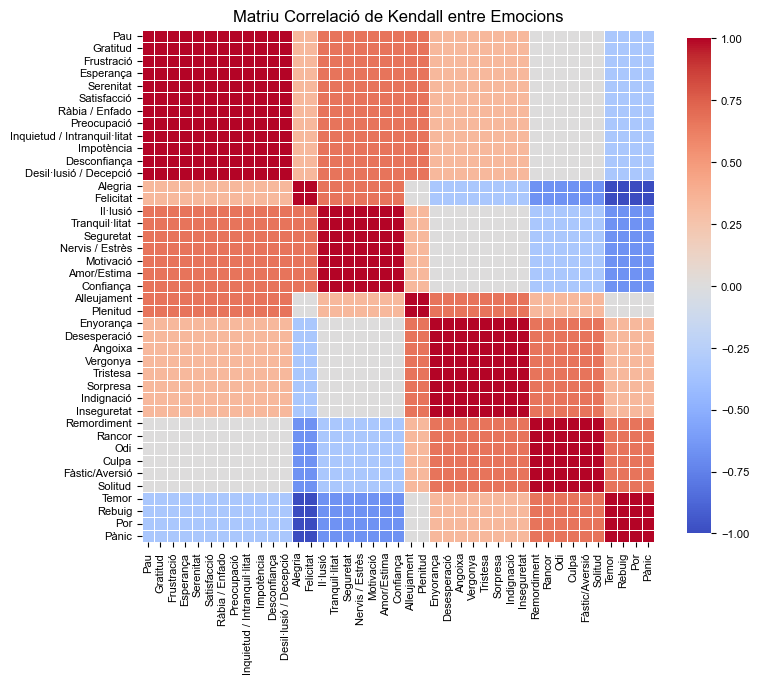

In [24]:
# Crear un mapa de calor para la correlaci√≥n de Kendall
fig, ax = plt.subplots(figsize=(8.27, 11.69)) # Crear figura con el tama√±o de A4 (DINA4)

# Crear un mapa de calor per a la correlaci√≥ de Kendall
sns.heatmap(sorted_kendall_corr, annot=False, cmap='coolwarm', fmt=".1f", square=True, 
            cbar_kws={"shrink": .55}, linewidths=.5, ax=ax)
ax.set_title('Matriu Correlaci√≥ de Kendall entre Emocions')
plt.show()

In [25]:
# Si se quiere guardar el gr√°fico al PC

# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gr√°ficos') 
# Guardar como PDF en tama√±o A4
fig.savefig(f'{savePath}/matriu_correlaci√≥_kendall_emocions_A4.pdf', format='pdf', bbox_inches='tight')

## 2. Sabries explicar com se senten √∫ltimament‚Ä¶?

### **Consciencia del sentir dels altres. Nivells d'empatia**
   **Pregunta:** Quants dels joves tenen consciencia de com se senten les persones amb les que conviuen?<br>
   **Pregunta:** Quin nivell d'empatia assoleixen la majoria dels joves?
   - **An√°lisis**: 
     - Calcular el percentatde de joves que saben com se senten els altres.
     - Calcular el percentatge de joves a cada nivell d'empatia
     - 
   - **Visualizaci√≥n**: 
     - **Gr√°fico  apilado** para comparar els percentatges a les diverses categories: familia, amistats, educadors i societat (altres)
     - **Gr√°fico asdf**

C:\Users\sebas\AppData\Local\Temp\ipykernel_3968\2286388592.py:50: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout()


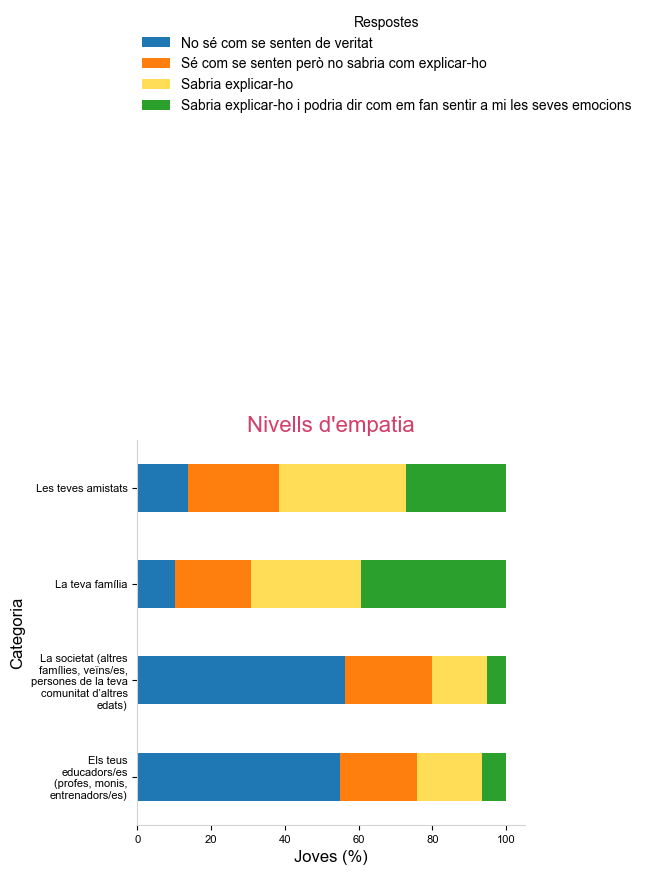

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap  

# Datos
data = SEJ_conciencia_sentir_p2.copy()
df = pd.DataFrame(data)

# Convertir cada columna en la frecuencia de las respuestas
df_melted = df.melt(var_name='Categoria', value_name='Resposta')

# Calcular los porcentajes por cada respuesta dentro de cada categor√≠a
df_percent = df_melted.groupby(['Categoria', 'Resposta']).size().unstack().fillna(0)
df_percent = df_percent.div(df_percent.sum(axis=1), axis=0) * 100  # Convertir a porcentajes

# Reordenar las categor√≠as de las respuestas
respuestas = list(df_percent.columns)  # Obtener la lista de respuestas
ultima_respuesta = respuestas.pop()  # Extraer la √∫ltima respuesta
respuestas.insert(1, ultima_respuesta)  # Insertarla en la segunda posici√≥n
df_percent = df_percent[respuestas]  # Reordenar las columnas del DataFrame

# Definir colores manualmente para representar niveles crecientes de empat√≠a
colores_manual = ["#1f77b4", "#ff7f0e", "#ffdd57", "#2ca02c"]

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(5, 5))  # Tama√±o A4 (DINA4) figsize=(8.27, 11.69)

# Crear el gr√°fico de barras apiladas con los ejes invertidos
df_percent.plot(kind='barh', stacked=True, color=colores_manual, ax=ax)

# A√±adir t√≠tulo y etiquetas
ax.set_title("Nivells d'empatia", fontsize=16, color="#D33F6A")
ax.set_xlabel('Joves (%)', fontsize=12)
ax.set_ylabel('Categoria', fontsize=12)

# Dividir los nombres de las categor√≠as en m√∫ltiples l√≠neas si son muy largos
ax.set_yticklabels(['\n'.join(textwrap.wrap(label, 20)) for label in df_percent.index])

# Mejorar la est√©tica del gr√°fico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")

# Mover la leyenda a la parte superior izquierda, fuera del gr√°fico
ax.legend(title="Respostes", bbox_to_anchor=(-0.02, 2.135), loc='upper left', fontsize=10, frameon=False)

# Ajustar el dise√±o para evitar cortes
fig.tight_layout()
plt.show()


In [82]:
# Si se quiere guardar el gr√°fico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gr√°ficos') 
# Guardar como PDF en tama√±o A4
fig.savefig(f'{savePath}/nivells_de_empatia.pdf', format='pdf', bbox_inches='tight')

## 3. Dona‚Äôt un minut per pensar en situacions de malestar a la teva classe. Com vius emocionalment tu, personalment, aquests moments? (marca'n una)

In [37]:
#Mapeja les respostes amb el diccionari
SEJ_conciencia_sentir_p3['categoria_codi_personal'] = SEJ_conciencia_sentir_p3['categoria moment actual personal'].map(transici√≥_emocional_personal_dict).fillna('altres per codificar')

#Calcula la freq√º√®ncia relativa en percentatge
freq_percentatge_personal = SEJ_conciencia_sentir_p3['categoria_codi_personal'].value_counts(normalize=True) * 100

#Mostra les dades ordenades
freq_percentatge_personal = freq_percentatge_personal.sort_values(ascending=False)

#Mostra les dades amb format m√©s clar (opcional)
print(freq_percentatge_personal.to_frame(name='Percentatge').reset_index().rename(columns={'index': 'Categoria'}))

  categoria_codi_personal  Percentatge
0                 Negaci√≥    28.571429
1               Agra√Øment    19.883041
2              Comprensi√≥    17.293233
3              Resignaci√≥    15.956558
4              Acceptaci√≥    11.862991
5    altres per codificar     6.432749


## 4. I, per aquestes situacions de malestar a la teva classe, com creus que les viu el grup? (marca'n una)

In [38]:
#Mapeja les respostes amb el diccionari
SEJ_conciencia_sentir_p4['categoria_codi_grupal'] = SEJ_conciencia_sentir_p4['categoria moment actual grup'].map(transici√≥_emocional_grupal_dict).fillna('altres per codificar')

#Calcula la freq√º√®ncia relativa en percentatge
freq_percentatge_grupal = SEJ_conciencia_sentir_p4['categoria_codi_grupal'].value_counts(normalize=True) * 100

#Mostra les dades ordenades
freq_percentatge_grupal = freq_percentatge_grupal.sort_values(ascending=False)

#Mostra les dades amb format m√©s clar (opcional)
print(freq_percentatge_grupal.to_frame(name='Percentatge').reset_index().rename(columns={'index': 'Categoria'}))

  categoria_codi_grupal  Percentatge
0            Acceptaci√≥    22.305764
1               Negaci√≥    21.971596
2            Resignaci√≥    19.381788
3            Comprensi√≥    16.624896
4             Agra√Øment     9.941520
5  altres per codificar     9.774436


## Preungtes 3 y 4. An√†lisi com√∫

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **1. C√†lcul dels percentatges per cada categoria**
# Percentatge de cada codi en els personals
percentatges_personals = (
    SEJ_conciencia_sentir_p3['categoria_codi_personal']
    .value_counts(normalize=True)
    .sort_index() * 100
)

# Percentatge de cada codi en els grupals
percentatges_grupals = (
    SEJ_conciencia_sentir_p4['categoria_codi_grupal']
    .value_counts(normalize=True)
    .sort_index() * 100
)

# **2. Crear un DataFrame per comparar els percentatges**
comparacio_df = pd.DataFrame({
    'Percentatge Personal': percentatges_personals,
    'Percentatge Grupal': percentatges_grupals
}).fillna(0)  # Omple amb 0 si alguna categoria no est√† present en un dels grups

print(comparacio_df)  # Mostra la taula per veure els percentatges



                      Percentatge Personal  Percentatge Grupal
Acceptaci√≥                       11.862991           22.305764
Agra√Øment                        19.883041            9.941520
Comprensi√≥                       17.293233           16.624896
Negaci√≥                          28.571429           21.971596
Resignaci√≥                       15.956558           19.381788
altres per codificar              6.432749            9.774436


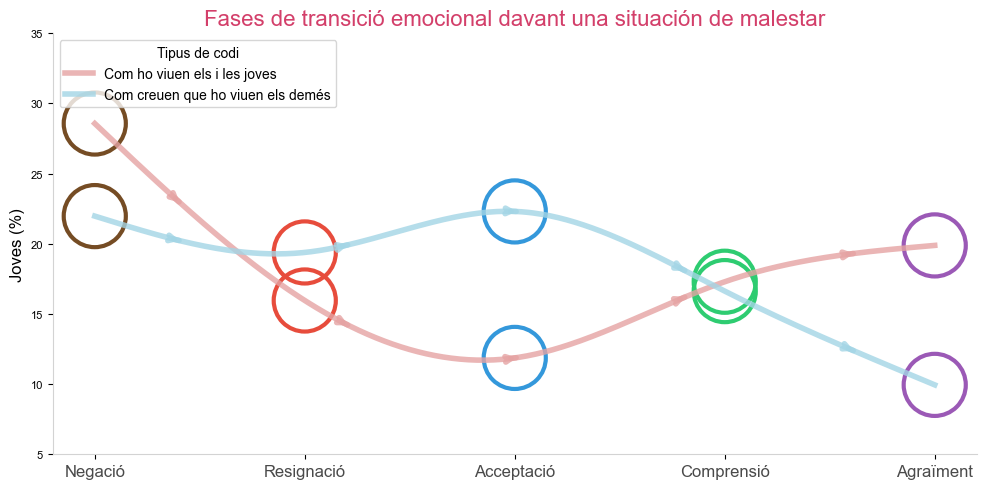

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# **Reordenar el DataFrame** para que siga el orden correcto de transici√≥ emocional
comparacio_df = comparacio_df.loc[transici√≥_emocional]  

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 5))

# Crear eje X num√©rico para la interpolaci√≥n
x_numeric = np.arange(len(transici√≥_emocional))

# Graficar cada columna con una curva interpolada c√∫bica
for i, col in enumerate(comparacio_df.columns):
    y_values = comparacio_df[col].values  # Valores de porcentaje
    
    # Crear interpolaci√≥n c√∫bica asegurando que pasa por los puntos exactos
    spline = CubicSpline(x_numeric, y_values, bc_type='natural')
    
    # Crear valores suavizados para X y Y
    x_smooth = np.linspace(x_numeric.min(), x_numeric.max(), 300)
    y_smooth = spline(x_smooth)
    
    # Dibujar la l√≠nea curva interpolada y asignar un label para la leyenda
    ax.plot(x_smooth, y_smooth, linestyle='-', linewidth=4, alpha=0.8, 
            label=f"{col}", color=['#E5A3A3', '#A3D5E5'][i])

    # Agregar flechas en la curva
    num_flechas = 5  # N√∫mero de flechas por curva
    posiciones_flechas = np.linspace(0.1, 0.9, num_flechas)  # Posiciones normalizadas

    for pos in posiciones_flechas:
        idx = int(pos * len(x_smooth))  # √çndice del punto donde colocar la flecha
        if idx >= len(x_smooth) - 1:
            continue

        # Calcular direcci√≥n de la curva (derivada)
        dx = x_smooth[idx + 1] - x_smooth[idx]
        dy = y_smooth[idx + 1] - y_smooth[idx]
        
        # Dibujar la flecha con un tama√±o proporcional
        ax.annotate(
            "", xy=(x_smooth[idx] + dx * 0.3, y_smooth[idx] + dy * 0.3), 
            xytext=(x_smooth[idx], y_smooth[idx]), 
            arrowprops=dict(arrowstyle="->", color=['#E5A3A3', '#A3D5E5'][i], lw=4, alpha=0.8)
        )

# Dibujar los c√≠rculos grandes para cada punto con bordes gruesos
for fase, x in zip(transici√≥_emocional, x_numeric):
    ax.scatter(x, comparacio_df.loc[fase, comparacio_df.columns[0]], 
               s=2000, facecolors='none', edgecolors=colors_transici√≥_emocional[fase], linewidth=3)
    
    ax.scatter(x, comparacio_df.loc[fase, comparacio_df.columns[1]], 
               s=2000, facecolors='none', edgecolors=colors_transici√≥_emocional[fase], linewidth=3)

# Personalizar t√≠tulos y etiquetas
ax.set_title("Fases de transici√≥ emocional davant una situaci√≥n de malestar", fontsize=16, color="#D33F6A")
ax.set_ylabel("Joves (%)", fontsize=12)
ax.set_xlabel("")
ax.set_xticks(x_numeric)
ax.set_xticklabels(transici√≥_emocional, fontsize=12, color="#4A4A4A")

# Mejorar la est√©tica del gr√°fico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")
#ax.grid(axis='y', linestyle='dashed', alpha=0.5)
ax.set_ylim(5, 35)

# Agregar leyenda y cambiar los t√≠tulos de los items
handles, labels = ax.get_legend_handles_labels()
labels[0] = f"Com ho viuen els i les joves"  # Cambiar el t√≠tulo del primer item
labels[1] = f"Com creuen que ho viuen els dem√©s"  # Cambiar el t√≠tulo del segundo item
ax.legend(handles, labels, title="Tipus de codi", loc="upper left", fontsize=10)

# Ajustar el dise√±o
fig.tight_layout()
plt.show()


In [55]:
# Si se quiere guardar el gr√°fico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gr√°ficos') 
# Guardar como PDF en tama√±o A4
fig.savefig(f'{savePath}/fases_de_transici√≥_emocional.pdf', format='pdf', bbox_inches='tight')


### 2. **Comparaci√≥n entre el estado emocional actual y deseado**
   **Pregunta:** ¬øC√≥mo difiere el estado emocional deseado del actual?
   - **An√°lisis**: 
     - Comparar las emociones actuales con aquellas que los j√≥venes consideran deseadas, identificando las principales diferencias entre ambos estados.
   - **Visualizaci√≥n**: 
     - **Gr√°fico de barras agrupadas** donde una barra representa la emoci√≥n actual y la otra la emoci√≥n deseada para cada tipo de sentimiento.

# An√°lisis Elecci√≥n personal

## 5. √öltimament, quan vull donar resposta a una situaci√≥ complexa emocionalment (complicada, que remou, que √©s o pot ser dif√≠cil de gestionar, etc.), jo...

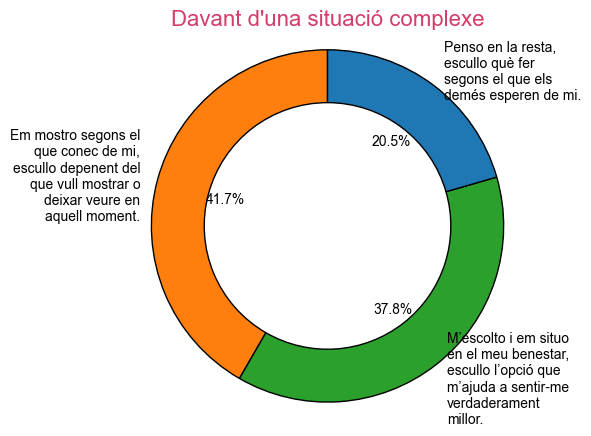

In [63]:
import matplotlib.pyplot as plt
import textwrap

# Definir els tres colors manualment
colors_personalitzats = ["#ff7f0e","#2ca02c","#1f77b4"] # üî∂ #ff7f0e ‚Üí Taronja (Orange), üü¢ #2ca02c ‚Üí Verd (Green), üîµ #1f77b4 ‚Üí Blau (Blue)

# Calcular els percentatges de cada categoria
porcentatges = SEJ_eleccio_personal_p5['categoria situaci√≥ complexe'].value_counts(normalize=True) * 100

# Filtrar les categories amb un percentatge menor a l'1%
porcentatges_filtrades = porcentatges[porcentatges >= 1]

# Assegurar que nom√©s es prenen els tres primers colors disponibles
colors_usats = colors_personalitzats[:len(porcentatges_filtrades)]

# Crear el gr√†fic de sectors (pie chart)
fig, ax = plt.subplots(figsize=(5, 5))

# Dividir els noms de les categories en 3-4 l√≠nies per millor llegibilitat
labels_wrapped = ['\n'.join(textwrap.wrap(label, width=20)) for label in porcentatges_filtrades.index]

# Crear el gr√†fic de sectors amb els colors personalitzats
ax.pie(porcentatges_filtrades, 
       labels=labels_wrapped,  
       autopct=lambda p: f'{p:.1f}%',  # Format de percentatge
       startangle=90, 
       wedgeprops={'width': 0.3, 'edgecolor': 'black'},  
       textprops={'color': 'k', 'fontsize': 10},  # Text en negre dins del gr√†fic
       colors=colors_usats)  # Aplicar els colors personalitzats

# Afegir el t√≠tol
ax.set_title("Davant d'una situaci√≥ complexe", fontsize=16, color="#D33F6A")

# Assegurar que el gr√†fic sigui un cercle
ax.axis('equal')

# Mostrar el gr√†fic
plt.show()



In [114]:
# Si se quiere guardar el gr√°fico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gr√°ficos') 
# Guardar como PDF en tama√±o A4
fig.savefig(f'{savePath}/situacions_complexes.pdf', format='pdf', bbox_inches='tight')

## 6. √öltimament, quan sento estr√®s, por, tristesa, r√†bia o alguna altra emoci√≥ desagradable, jo...

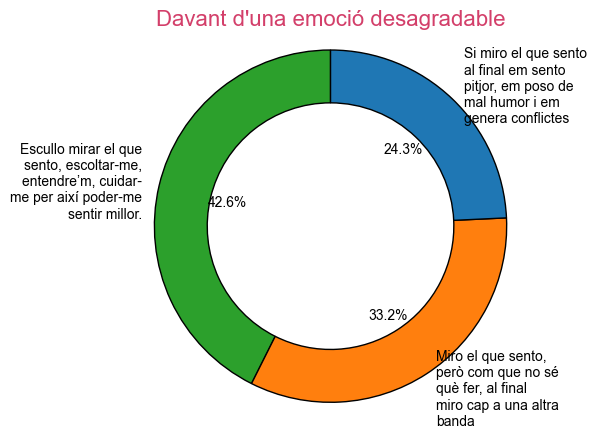

In [62]:
import matplotlib.pyplot as plt
import textwrap

# Definir els tres colors manualment
colors_personalitzats = ["#2ca02c", "#ff7f0e","#1f77b4"]  # üî∂ #ff7f0e ‚Üí Taronja (Orange), üü¢ #2ca02c ‚Üí Verd (Green), üîµ #1f77b4 ‚Üí Blau (Blue)

# Calcular els percentatges de cada categoria
porcentatges = SEJ_eleccio_personal_p6['categria emoci√≥ desagradable'].value_counts(normalize=True) * 100

# Filtrar les categories amb un percentatge menor a l'1%
porcentatges_filtrades = porcentatges[porcentatges >= 1]

# Assegurar que nom√©s es prenen els tres primers colors disponibles
colors_usats = colors_personalitzats[:len(porcentatges_filtrades)]

# Crear el gr√†fic de sectors (pie chart)
fig, ax = plt.subplots(figsize=(5, 5))

# Dividir els noms de les categories en 3-4 l√≠nies per millor llegibilitat
labels_wrapped = ['\n'.join(textwrap.wrap(label, width=20)) for label in porcentatges_filtrades.index]

# Crear el gr√†fic de sectors amb els colors personalitzats
ax.pie(porcentatges_filtrades, 
       labels=labels_wrapped,  
       autopct=lambda p: f'{p:.1f}%',  # Format de percentatge
       startangle=90, 
       wedgeprops={'width': 0.3, 'edgecolor': 'black'},  
       textprops={'color': 'k', 'fontsize': 10},  # Text en negre dins del gr√†fic
       colors=colors_usats)  # Aplicar els colors personalitzats

# Afegir el t√≠tol
ax.set_title("Davant d'una emoci√≥ desagradable", fontsize=16, color="#D33F6A")

# Assegurar que el gr√†fic sigui un cercle
ax.axis('equal')

# Mostrar el gr√†fic
plt.show()


In [117]:
# Si se quiere guardar el gr√°fico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gr√°ficos') 
# Guardar como PDF en tama√±o A4
fig.savefig(f'{savePath}/emocions_desagradables.pdf', format='pdf', bbox_inches='tight')

# An√°lisis Responsabilidad individual

## 7. Davant de les diferents emocions que apareixen en situacions complicades, quins comportaments tens? Qu√® fas? (marca totes les que facis)

In [138]:
SEJ_resp_individual_p7

categoria comportaments
1     Faig com si res i m'evadeixo de les meves emoc...
2     Em pressiono tractant de resoldre tot el que p...
3     Faig com si res i m'evadeixo de les meves emoc...
4     Em bloquejo. Em costa respondre., Faig com si ...
5     Em bloquejo. Em costa respondre., M‚Äôho guardo,...
...                                                 ...
1314  Em pressiono tractant de resoldre tot el que p...
1315  Em pressiono tractant de resoldre tot el que p...
1316  Em bloquejo. Em costa respondre., Perdo el con...
1317  M‚Äôho guardo, prefereixo no expressar com estic...
1318  Em bloquejo. Em costa respondre., Intento dona...

[1197 rows x 1 columns]

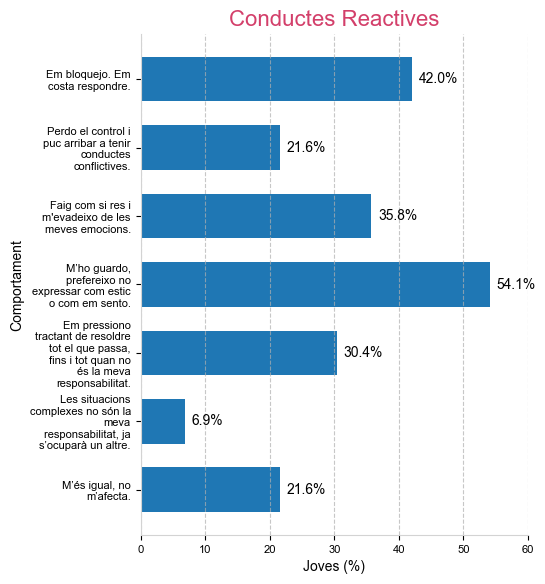

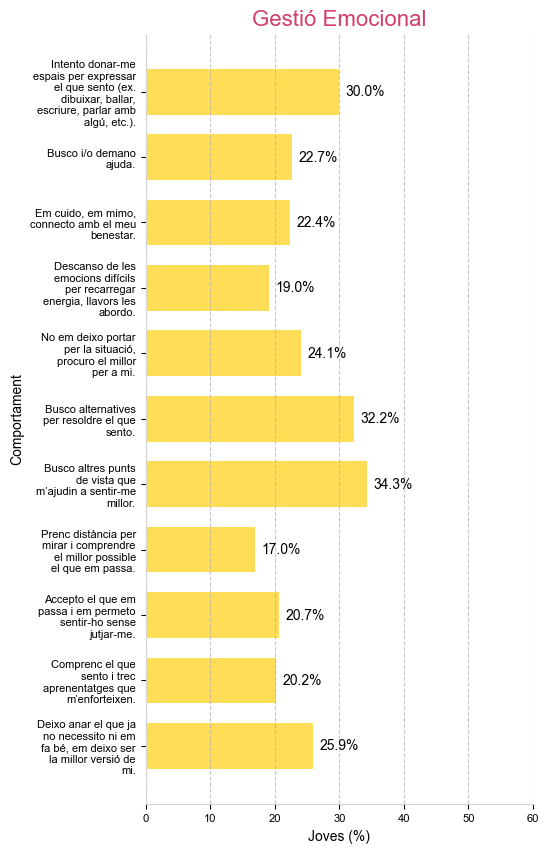

In [61]:
import textwrap

# Paso 1: Separar las frases correctamente
SEJ_resp_individual_p7['comportaments'] = SEJ_resp_individual_p7['categoria comportaments'].apply(
    lambda x: re.split(r'(?<=\.)\, ', x)
)

# Paso 2: Explorar las frases en filas separadas
SEJ_resp_individual_p7_1 = SEJ_resp_individual_p7.explode('comportaments').copy()

# Paso 3: Eliminar duplicados (para que cada persona cuente solo una vez por comportamiento)
#SEJ_resp_individual_p7_1 = SEJ_resp_individual_p7_1.drop_duplicates()

# Paso 4: Contar cu√°ntas personas han seleccionado cada comportamiento
categoria_counts = SEJ_resp_individual_p7_1['comportaments'].value_counts()

# Paso 5: Convertir a porcentaje del total de personas
categoria_percent = (categoria_counts / len(SEJ_resp_individual_p7)) * 100

# Paso 6: Filtrar y ordenar seg√∫n listas definidas
conductes_reactives_dict = {c: categoria_percent.get(c, 0) for c in conductes_reactives}
gestio_emocional_dict = {c: categoria_percent.get(c, 0) for c in gestio_emocional}

# Funci√≥n para dividir el texto en l√≠neas
def wrap_text(text, width=20):
    return textwrap.fill(text, width=width)

# Paso 7: Graficar Conductes Reactives
fig1, ax1 = plt.subplots(figsize=(5, 6.5))  # Aumentar el tama√±o para evitar solapamientos
# Dividir las categor√≠as del eje Y en varias l√≠neas
wrapped_categories_conductes = [wrap_text(cat) for cat in list(conductes_reactives_dict.keys())]
bars1 = ax1.barh(wrapped_categories_conductes, list(conductes_reactives_dict.values()), color="#1f77b4", height=0.65)  # Aumentar el espacio entre las barras
ax1.set_xlabel("Joves (%)")
ax1.set_ylabel("Comportament")
ax1.set_title("Conductes Reactives", fontsize=16, color="#D33F6A")
ax1.grid(axis='x', linestyle='--', alpha=0.7)

# A√±adir texto con los porcentajes
for bar in bars1:
    width = bar.get_width()
    ax1.text(width + 1, bar.get_y() + bar.get_height()/2, f"{width:.1f}%", va='center')

# Mejorar la est√©tica del gr√°fico
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_color("#D3D3D3")
ax1.spines['bottom'].set_color("#D3D3D3")
ax1.set_xlim(0, 60)


# Paso 8: Graficar Gesti√≥ Emocional
fig2, ax2 = plt.subplots(figsize=(5, 10))  # Aumentar el tama√±o para evitar solapamientos
# Dividir las categor√≠as del eje Y en varias l√≠neas
wrapped_categories_gestio = [wrap_text(cat) for cat in list(gestio_emocional_dict.keys())]
bars2 = ax2.barh(wrapped_categories_gestio, list(gestio_emocional_dict.values()), color="#ffdd57", height=0.7)  # Aumentar el espacio entre las barras
ax2.set_xlabel("Joves (%)")
ax2.set_ylabel("Comportament")
ax2.set_title("Gesti√≥ Emocional", fontsize=16, color="#D33F6A")
ax2.grid(axis='x', linestyle='--', alpha=0.7)

# A√±adir texto con los porcentajes
for bar in bars2:
    width = bar.get_width()
    ax2.text(width + 1, bar.get_y() + bar.get_height()/2, f"{width:.1f}%", va='center')

# Mejorar la est√©tica del gr√°fico
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_color("#D3D3D3")
ax2.spines['bottom'].set_color("#D3D3D3")
ax2.set_xlim(0, 60)

# Mostrar gr√°ficos
plt.show()




In [147]:
# Si se quiere guardar el gr√°fico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gr√°ficos') 
# Guardar como PDF en tama√±o A4
fig1.savefig(f'{savePath}/conductes_reactives.pdf', format='pdf', bbox_inches='tight')

# Si se quiere guardar el gr√°fico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gr√°ficos') 
# Guardar como PDF en tama√±o A4
fig2.savefig(f'{savePath}/gestio_emocional.pdf', format='pdf', bbox_inches='tight')

## 8. Si sents o sentissis angoixa, disgust o tristesa profunda, a qui recorres? (marca totes les que creguis que tenen a veure amb el que fas)

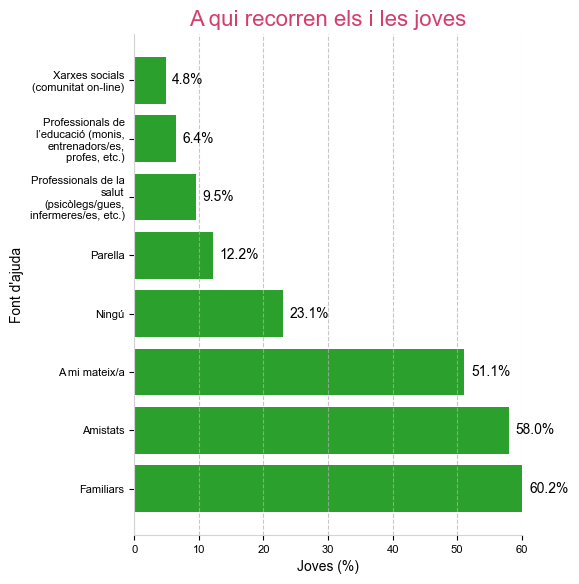

In [59]:
import textwrap

# Paso 1: Separar las frases correctamente
SEJ_resp_individual_p8['suport'] = SEJ_resp_individual_p8['categoria suport'].apply(
    lambda x: re.split(r',\s(?=[A-Z])', x)
)

# Paso 2: Explorar las frases en filas separadas
SEJ_resp_individual_p8_1 = SEJ_resp_individual_p8.explode('suport').copy()

# Paso 3: Eliminar duplicados (para que cada persona cuente solo una vez por comportamiento)
#SEJ_resp_individual_p8_1 = SEJ_resp_individual_p8_1.drop_duplicates()

# Paso 4: Contar cu√°ntas personas han seleccionado cada comportamiento
categoria_counts = SEJ_resp_individual_p8_1['suport'].value_counts()

# Paso 5: Convertir a porcentaje del total de personas
categoria_percent = (categoria_counts / len(SEJ_resp_individual_p8)) * 100

# Filtrar categor√≠as con m√°s del 1%
categoria_percent = categoria_percent[categoria_percent > 1]

# Funci√≥n para dividir el texto en l√≠neas
def wrap_text(text, width=20):
    return textwrap.fill(text, width=width)

# Paso 6: Graficar
fig, ax = plt.subplots(figsize=(5, 6.5))  # Aumentar el tama√±o para evitar solapamientos
# Dividir las categor√≠as del eje Y en varias l√≠neas
wrapped_categories = [wrap_text(cat) for cat in list(categoria_percent.index)]
bars = ax.barh(wrapped_categories, list(categoria_percent.values), color="#2ca02c", height=0.8)  # Aumentar el espacio entre las barras
ax.set_xlabel("Joves (%)")
ax.set_ylabel("Font d'ajuda")
ax.set_title("A qui recorren els i les joves", fontsize=16, color="#D33F6A")
ax.grid(axis='x', linestyle='--', alpha=0.7)

# A√±adir texto con los porcentajes
for bar in bars:
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2, f"{width:.1f}%", va='center')

# Mejorar la est√©tica del gr√°fico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")
ax.set_xlim(0, 60)

# Mostrar gr√°fico
plt.show()


In [153]:
# Si se quiere guardar el gr√°fico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gr√°ficos') 
# Guardar como PDF en tama√±o A4
fig.savefig(f'{savePath}/font_ajuda.pdf', format='pdf', bbox_inches='tight')

# An√°lisis Entorno

## 9. Pensa en les relacions que has tingut √∫ltimament (amb les teves amistats, fam√≠lia, comunitat escolar, etc.). Quan ha sigut l‚Äô√∫ltima vegada que has sentit que alg√∫ et preguntava de veritat, amb √†nim de saber la teva resposta, com et sents?

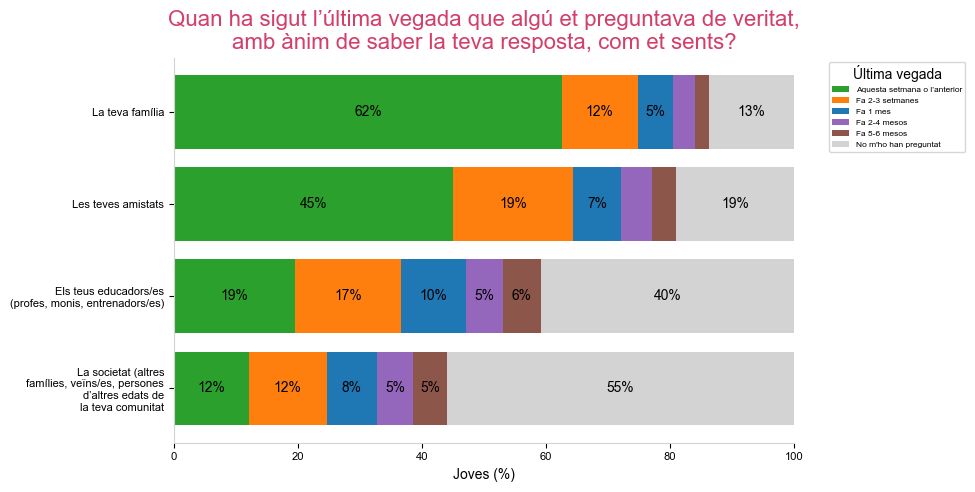

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# Reordenar les categories en l'ordre correcte
categories_ordre = [
    "Aquesta setmana o l‚Äôanterior",
    "Fa 2-3 setmanes",
    "Fa 1 mes",
    "Fa 2-4 mesos",
    "Fa 5-6 mesos",
    "No m'ho han preguntat"
]

# Comptar la freq√º√®ncia de cada categoria per a cada grup (fam√≠lia, amistats, educadors, societat)
freq_per_grup = SEJ_entorn_p9.apply(lambda col: col.value_counts(normalize=True) * 100).fillna(0)

# Reordenar les files segons l'ordre de les categories
freq_per_grup = freq_per_grup.loc[categories_ordre]

# Definir colors per a cada categoria (basats en la imatge de refer√®ncia)
colors = {
    "Aquesta setmana o l‚Äôanterior": "#78C679",
    "Fa 2-3 setmanes": "#FDC04E",
    "Fa 1 mes": "#F98481",
    "Fa 2-4 mesos": "#E55D5D",
    "Fa 5-6 mesos": "#999999",
    "No m'ho han preguntat": "#D3D3D3"
}

colors = {
    "Aquesta setmana o l‚Äôanterior": "#2ca02c",  # Verd ‚Üí Recent
    "Fa 2-3 setmanes": "#ff7f0e",  # Taronja ‚Üí Intermig
    "Fa 1 mes": "#1f77b4",  # Blau ‚Üí Encara recent
    "Fa 2-4 mesos": "#9467bd",  # Lila ‚Üí M√©s antic
    "Fa 5-6 mesos": "#8c564b",  # Marr√≥ ‚Üí For√ßa antic
    "No m'ho han preguntat": "#D3D3D3"  # Gris ‚Üí No preguntat
}

# Crear el gr√†fic de barres apilades
fig, ax = plt.subplots(figsize=(8, 5))

# Apilar les barres per cada categoria
bottom_values = None  # Per comen√ßar des de 0
for categoria in categories_ordre:
    values = freq_per_grup.loc[categoria]
    ax.barh(freq_per_grup.columns, values, color=colors[categoria], label=categoria, left=bottom_values)
    
    # Acumular valors per a la seg√ºent categoria
    bottom_values = values if bottom_values is None else bottom_values + values

# Afegir percentatges dins de cada barra
for idx, col in enumerate(freq_per_grup.columns):
    cumulative = 0
    for categoria in categories_ordre:
        value = freq_per_grup.loc[categoria, col]
        if value > 5:  # Nom√©s mostrar etiquetes si el valor √©s significatiu
            ax.text(cumulative + value / 2, idx, f"{int(value)}%", ha="center", va="center", fontsize=10, color="black")
        cumulative += value

# Estil del gr√†fic
ax.set_xlabel("Joves (%)")
ax.set_xlim(0, 100)
ax.set_xticks(range(0, 101, 20))

# Modificar el t√≠tol per posar-lo en dues l√≠nies
ax.set_title("Quan ha sigut l‚Äô√∫ltima vegada que alg√∫ et preguntava de veritat,\namb √†nim de saber la teva resposta, com et sents?", fontsize=16, color="#D33F6A")

# Millorar la est√®tica del gr√†fic
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#D3D3D3")
ax.spines['bottom'].set_color("#D3D3D3")

# Llegenda
ax.legend(title="√öltima vegada", bbox_to_anchor=(1.05, 1), loc="upper left")

# Invertir l'ordre de les categories per coincidir amb la imatge
ax.invert_yaxis()

# Funci√≥ per formatar les etiquetes de l'eix Y
def format_labels(label):
    label_text = label.get_text()  # Obtenir el text de l'etiqueta
    words = label_text.split()
    if len(words) > 3:
        # Divideix en l√≠nies de 3 paraules
        return '\n'.join([' '.join(words[i:i+3]) for i in range(0, len(words), 3)])
    return label_text

# Obtenir les ubicacions de les etiquetes (ticks) de l'eix Y
yticks = ax.get_yticks()

# Actualitzar les etiquetes de l'eix Y
ax.set_yticks(yticks)  # Assegurem-nos que els ticks siguin els mateixos
ax.set_yticklabels([format_labels(label) for label in ax.get_yticklabels()])

# Mostrar gr√†fic
plt.show()



In [136]:
# Si se quiere guardar el gr√°fico al PC
# Definiendo directorios
mainFolder = r'D:\Education\SEJ'
savePath = os.path.join(mainFolder,'Gr√°ficos') 
# Guardar como PDF en tama√±o A4
fig.savefig(f'{savePath}/entorn_com_et_sents.pdf', format='pdf', bbox_inches='tight')

## 10. √öltimament, com est√†s vivint emocionalment les seg√ºents situacions?

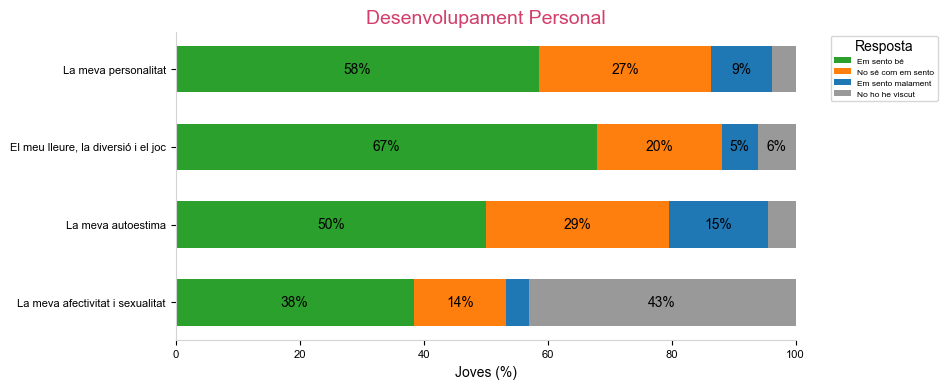

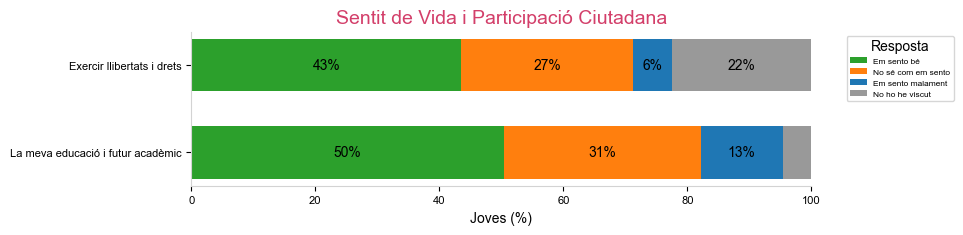

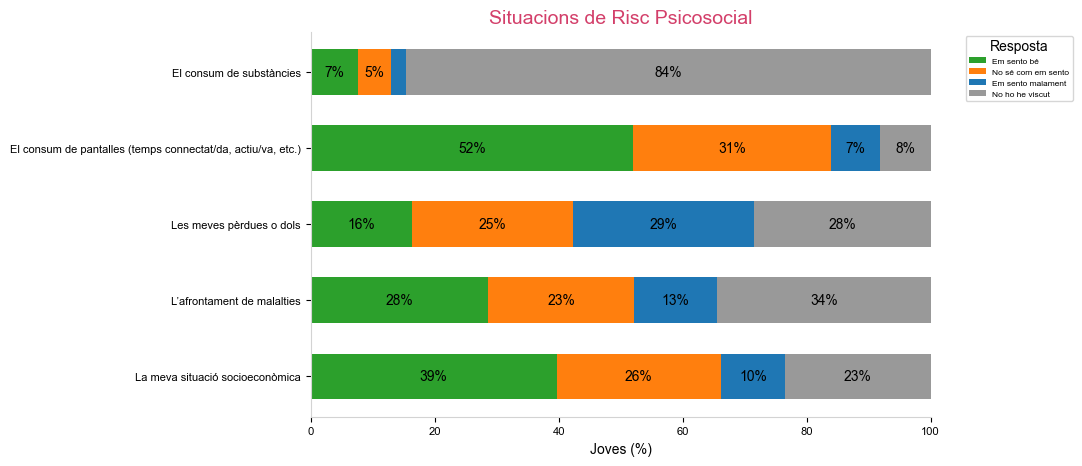

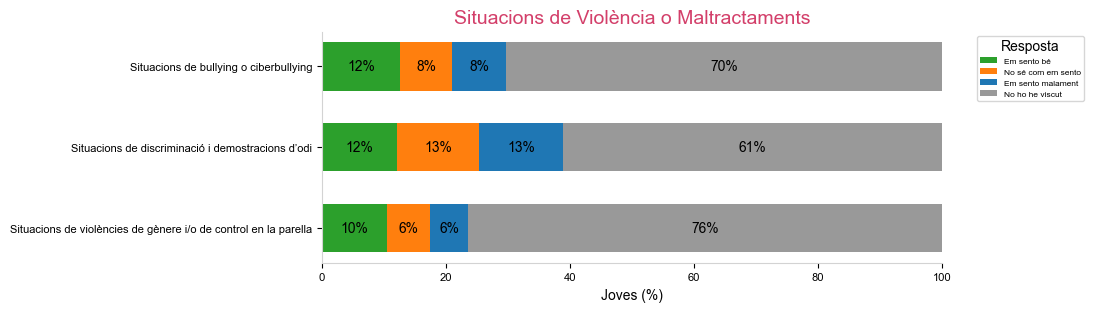

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Llistat de respostes possibles i colors assignats
categories_ordre = ["Em sento b√©", "No s√© com em sento", "Em sento malament", "No ho he viscut"]
colors = {
    "Em sento b√©": "#2ca02c",
    "No s√© com em sento": "#ff7f0e",
    "Em sento malament": "#1f77b4",
    "No ho he viscut": "#999999"
}


# Llistat de grups per generar els gr√†fics
grups = {
    "√Ämbit Relacional": ambit_relacional,
    "Desenvolupament Personal": desenvolupament_personal,
    "Sentit de Vida i Participaci√≥ Ciutadana": sentit_vida_participacio_ciutadana,
    "Situacions de Risc Psicosocial": situacions_risc_psicosocial,
    "Situacions de Viol√®ncia o Maltractaments": situacions_violencia_o_maltractaments
}

# Carregar el dataframe 
df = SEJ_entorn_p10.copy()

# Definir una amplada uniforme per a les barres
bar_height = 0.6  # Amplada fixa per a totes les barres
espai_inter_barres = 0.4  # Espai fix entre barres

# Generar els gr√†fics
for nom_grup, columnes in grups.items():
    # Comptar la freq√º√®ncia relativa per a cada categoria en cada columna del grup
    freq_per_grup = df[columnes].apply(lambda col: col.value_counts(normalize=True) * 100).fillna(0)
    freq_per_grup = freq_per_grup.loc[categories_ordre]  # Ordenar categories

    # Crear el gr√†fic de barres apilades
    fig, ax = plt.subplots(figsize=(8, len(columnes) * (bar_height + espai_inter_barres)))
    
    # Definir la posici√≥ fixa de les barres per mantenir una dist√†ncia constant
    y_positions = np.arange(len(columnes)) * (bar_height + espai_inter_barres)
    
    bottom_values = np.zeros(len(columnes))  # Inicialitzar valors acumulats

    for categoria in categories_ordre:
        values = freq_per_grup.loc[categoria]
        ax.barh(y_positions, values, color=colors[categoria], label=categoria, height=bar_height, left=bottom_values)
        bottom_values += values

    # Afegir percentatges dins de cada barra
    for idx, col in enumerate(columnes):
        cumulative = 0
        for categoria in categories_ordre:
            value = freq_per_grup.loc[categoria, col]
            if value > 5:  # Nom√©s mostrar etiquetes si √©s significatiu
                ax.text(cumulative + value / 2, y_positions[idx], f"{int(value)}%", 
                        ha="center", va="center", fontsize=10, color="black")
            cumulative += value

    # Estil del gr√†fic
    ax.set_xlabel("Joves (%)")
    ax.set_xlim(0, 100)
    ax.set_xticks(range(0, 101, 20))
    ax.set_title(nom_grup, fontsize=14, color="#D33F6A")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color("#D3D3D3")
    ax.spines['bottom'].set_color("#D3D3D3")
    ax.legend(title="Resposta", bbox_to_anchor=(1.05, 1), loc="upper left")
    ax.invert_yaxis()  # Posar el primer element a dalt

    # Fixar els ticks i etiquetes manualment per evitar el warning
    ax.set_yticks(y_positions)
    ax.set_yticklabels(columnes)

    # Mostrar el gr√†fic
    plt.show()

    # Si se quiere guardar el gr√°fico al PC
    # Definiendo directorios
    mainFolder = r'D:\Education\SEJ'
    savePath = os.path.join(mainFolder,'Gr√°ficos') 
    # Guardar como PDF en tama√±o A4
    fig.savefig(f'{savePath}/{nom_grup}.pdf', format='pdf', bbox_inches='tight')


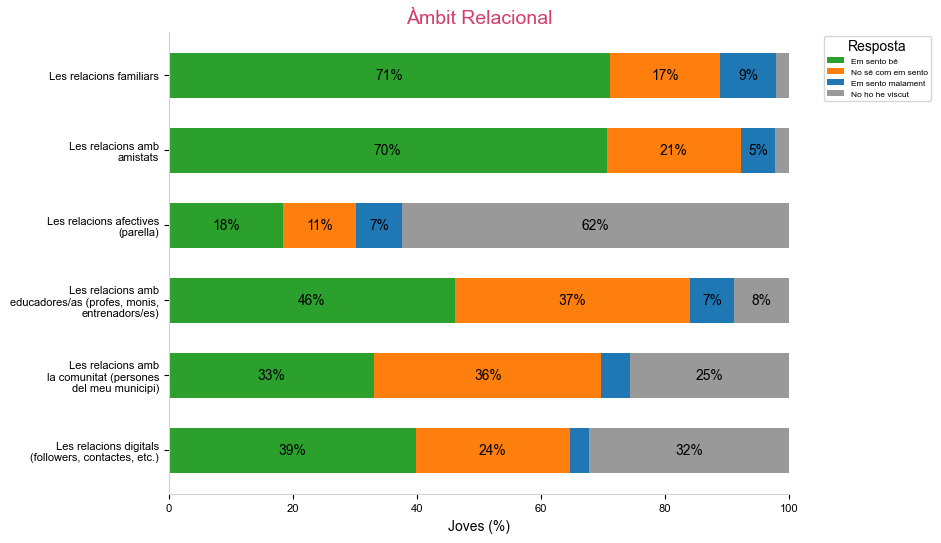

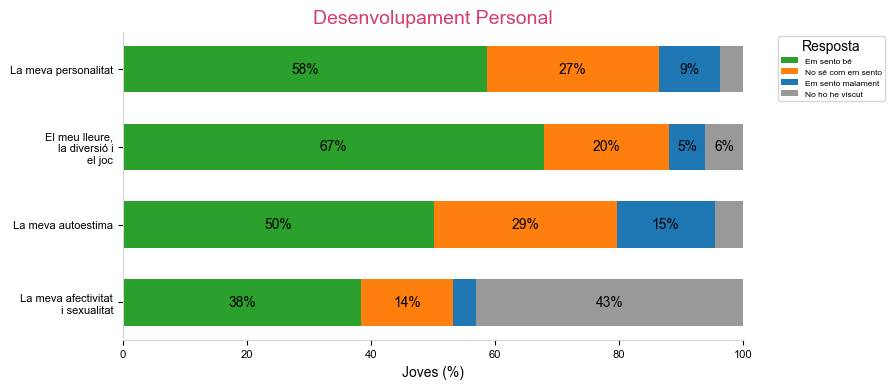

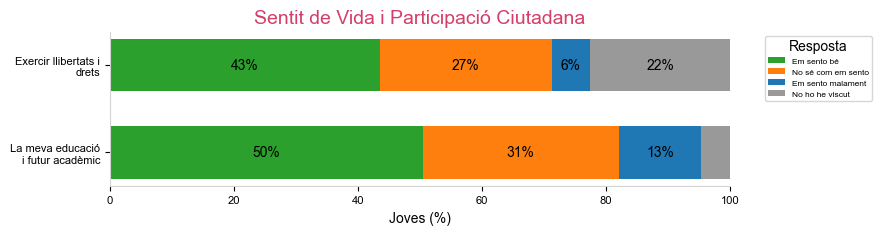

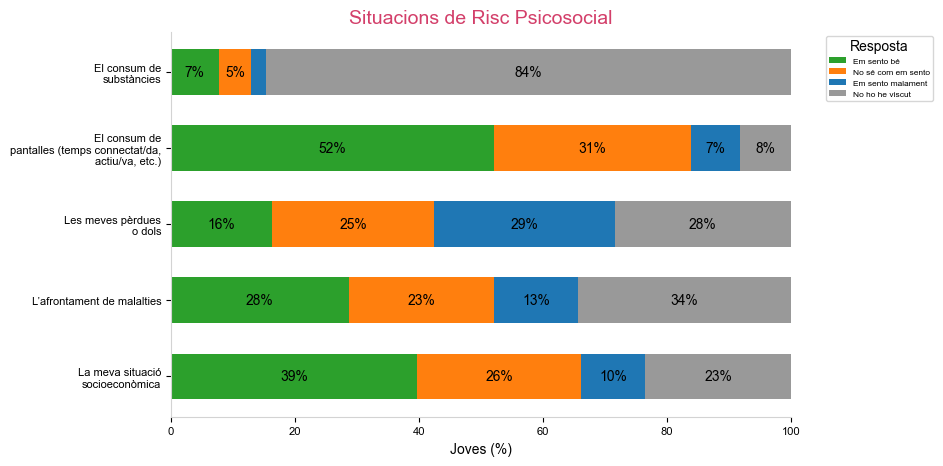

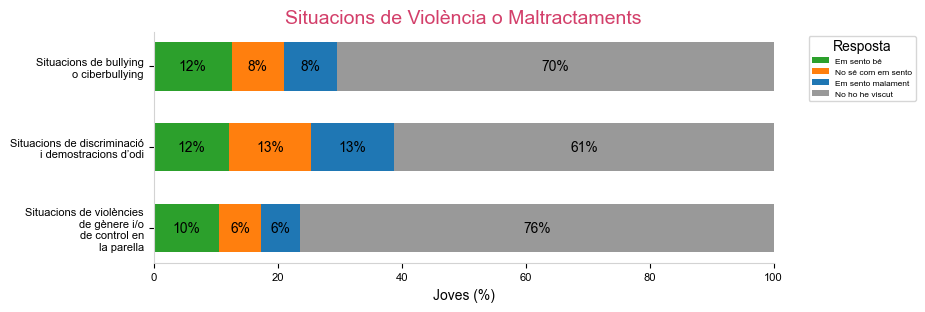

In [56]:
# Llistat de respostes possibles i colors assignats
categories_ordre = ["Em sento b√©", "No s√© com em sento", "Em sento malament", "No ho he viscut"]

colors = {
    "Em sento b√©": "#2ca02c",
    "No s√© com em sento": "#ff7f0e",
    "Em sento malament": "#1f77b4",
    "No ho he viscut": "#999999"
}

# Llistat de grups per generar els gr√†fics
grups = {
    "√Ämbit Relacional": ambit_relacional,
    "Desenvolupament Personal": desenvolupament_personal,
    "Sentit de Vida i Participaci√≥ Ciutadana": sentit_vida_participacio_ciutadana,
    "Situacions de Risc Psicosocial": situacions_risc_psicosocial,
    "Situacions de Viol√®ncia o Maltractaments": situacions_violencia_o_maltractaments
}

# Carregar el dataframe (substitueix 'dades.csv' pel teu fitxer real)
df = SEJ_entorn_p10.copy()

# Definir una amplada uniforme per a les barres
bar_height = 0.6  # Amplada fixa per a totes les barres
espai_inter_barres = 0.4  # Espai fix entre barres

# Funci√≥ per formatar les etiquetes de l'eix Y
def format_labels(label):
    words = label.split()
    if len(words) > 3:
        return '\n'.join([' '.join(words[i:i+3]) for i in range(0, len(words), 3)])
    return label

# Generar els gr√†fics
for nom_grup, columnes in grups.items():
    # Comptar la freq√º√®ncia relativa per a cada categoria en cada columna del grup
    freq_per_grup = df[columnes].apply(lambda col: col.value_counts(normalize=True) * 100).fillna(0)
    freq_per_grup = freq_per_grup.loc[categories_ordre]  # Ordenar categories

    # Crear el gr√†fic de barres apilades
    fig, ax = plt.subplots(figsize=(8, len(columnes) * (bar_height + espai_inter_barres)))
    
    # Definir la posici√≥ fixa de les barres per mantenir una dist√†ncia constant
    y_positions = np.arange(len(columnes)) * (bar_height + espai_inter_barres)
    
    bottom_values = np.zeros(len(columnes))  # Inicialitzar valors acumulats

    for categoria in categories_ordre:
        values = freq_per_grup.loc[categoria]
        ax.barh(y_positions, values, color=colors[categoria], label=categoria, height=bar_height, left=bottom_values)
        bottom_values += values

    # Afegir percentatges dins de cada barra
    for idx, col in enumerate(columnes):
        cumulative = 0
        for categoria in categories_ordre:
            value = freq_per_grup.loc[categoria, col]
            if value > 5:  # Nom√©s mostrar etiquetes si √©s significatiu
                ax.text(cumulative + value / 2, y_positions[idx], f"{int(value)}%", 
                        ha="center", va="center", fontsize=10, color="black")
            cumulative += value

    # Estil del gr√†fic
    ax.set_xlabel("Joves (%)")
    ax.set_xlim(0, 100)
    ax.set_xticks(range(0, 101, 20))
    ax.set_title(nom_grup, fontsize=14, color="#D33F6A")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color("#D3D3D3")
    ax.spines['bottom'].set_color("#D3D3D3")
    ax.legend(title="Resposta", bbox_to_anchor=(1.05, 1), loc="upper left")
    ax.invert_yaxis()  # Posar el primer element a dalt

    # Fixar els ticks i etiquetes manualment per evitar el warning
    ax.set_yticks(y_positions)
    ax.set_yticklabels([format_labels(label) for label in columnes])

    # Mostrar el gr√†fic
    plt.show()

    # Si se quiere guardar el gr√°fico al PC
    # Definiendo directorios
    mainFolder = r'D:\Education\SEJ'
    savePath = os.path.join(mainFolder,'Gr√°ficos') 
    # Guardar como PDF en tama√±o A4
    fig.savefig(f'{savePath}/{nom_grup}.pdf', format='pdf', bbox_inches='tight')

# An√°lisis demogr√°fico

Basado en los datos del dataframe **SEJ_demografics**, que incluye informaci√≥n sobre la Edat, Ocupaci√≥n, Distribuci√≥ Territorial, Sexe biol√≤gic, G√®nere y las personas con las que viven, se pueden realizar diversos an√°lisis y gr√°ficos interesantes. 

In [127]:
import pandas as pd

# Seleccionar nom√©s les columnes d'inter√®s
columns_of_interest = ['Distribuci√≥ Territorial', 'Edat', 'G√®nere', 'Ocupaci√≥', 'Sexe biol√≤gic']

# Subconjunt del DataFrame nom√©s amb les columnes seleccionades
SEJ_demografics = SEJ_demografics[columns_of_interest].copy()

In [132]:
# Convertir totes les columnes a tipus de dades de categoria
SEJ_demografics= SEJ_demografics.apply(lambda x: x.astype('category'))
print(f"Nombre final de participants: {len(SEJ_demografics)}")
print("\n")

# Crear una tabla individual para cada columna
taulas_percentatges = {columna: round(SEJ_demografics[columna].value_counts(normalize=True) * 100,2) for columna in SEJ_demografics.columns}

# Mostrar las tablas individuales
for columna, taula in taulas_percentatges.items():
    #print(f"Percentajes para la columna '{columna}':")
    display(taula)
    print("\n")

Nombre final de participants: 1197




Distribuci√≥ Territorial
Vilanova i la Geltr√∫    51.04
Cubelles                31.24
Sant Pere de Ribes       9.11
Canyelles                7.77
Sitges                   0.67
Olivella                 0.17
Name: proportion, dtype: float64

Edat
15.0    27.74
14.0    24.23
13.0    19.21
12.0    14.54
16.0     9.11
17.0     3.26
18.0     1.25
19.0     0.67
Name: proportion, dtype: float64

G√®nere
Home         51.80
Dona         47.03
No ho s√©      1.00
No binari     0.17
Name: proportion, dtype: float64

Ocupaci√≥
4t d'ESO                  31.24
3r d'ESO                  24.98
2n d'ESO                  19.05
1r d'ESO                  12.95
Formaci√≥ professional      4.93
1r Batx.                   4.68
2n Batx.                   1.75
Formaci√≥ universit√†ria     0.33
No estudio                 0.08
Name: proportion, dtype: float64

Sexe biol√≤gic
Mascle         51.63
Femella        48.20
Intersexual     0.17
Name: proportion, dtype: float64

## Figuras individuales

### Distribuci√≥n de edades

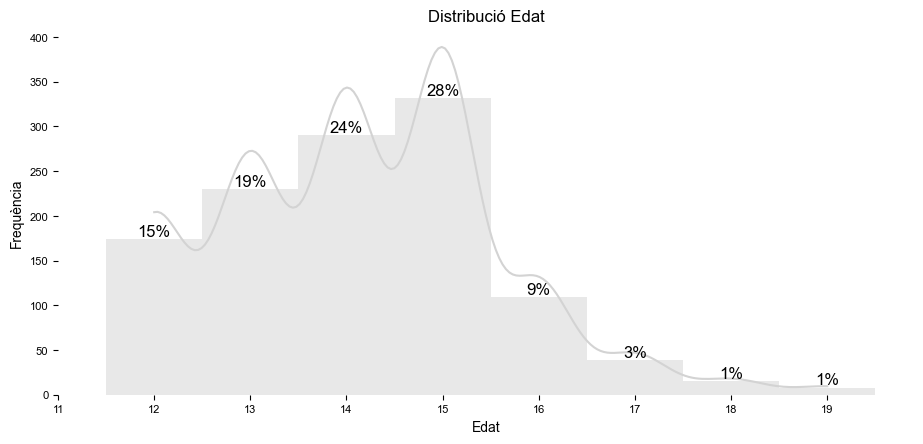

In [129]:
# Gr√°fico 1: Distribuci√≥n de edades
# Crear figura y subplots con el tama√±o de A4 (DINA4)
fig, axs = plt.subplots(figsize=(10, 5))  # 5 filas, 2 columnas (10 gr√°ficos) figsize=(8.27, 11.69)
fig.tight_layout(pad=4.0)  # Ajustar espacio entre subplots

# Gr√°fico 1: Distribuci√≥n de la Edat
histplot = sns.histplot(SEJ_demografics['Edat'], kde=True, binwidth=1, ax=axs,color= 'lightgray', edgecolor=None)
axs.set_title('Distribuci√≥ Edat')
axs.set_xlabel('Edat')
axs.set_ylabel('Frequ√®ncia')


# Obtener los datos de la gr√°fica
counts = [patch.get_height() for patch in histplot.patches]
bin_edges = [patch.get_x() for patch in histplot.patches] + [patch.get_x() + patch.get_width() for patch in histplot.patches]

# Calcular el total de conteo
total_count = sum(counts)

# A√±adir porcentaje sobre cada bin
for count, bin_edge in zip(counts, bin_edges[:-1]):  # Exclude last edge as it's not a bin
    if count > 0:  # Solo anotar si hay conteo
        percentage = (count / total_count) * 100
        axs.text(bin_edge + 0.5, count, f'{percentage:.0f}%', ha='center', va='bottom',fontsize=12,fontfamily='Arial')

# Ajustar los ticks del eje x para que sean n√∫meros enteros
axs.set_xticks(range(int(min(bin_edges)), int(max(bin_edges)) + 1))  # Establecer los ticks en n√∫meros enteros
        
axs.set_frame_on(False)     


### Distribuci√≥n de territorios

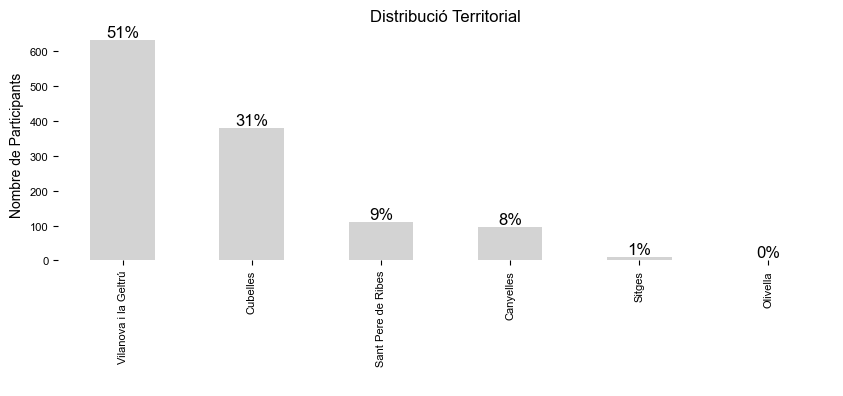

In [71]:
# Gr√°fico 2: Distribuci√≥n Territorial
fig, axs = plt.subplots(figsize=(10, 3))  # 5 filas, 2 columnas (10 gr√°ficos) figsize=(8.27, 11.69)
# Cambiar el fondo a negro para la figura y los ejes
#fig.patch.set_facecolor('black')
#axs.set_facecolor('black')

counts = SEJ_demografics['Distribuci√≥ Territorial'].value_counts()
bar_plot = counts.plot(kind='bar', ax=axs, color= 'lightgray')
axs.set_title('Distribuci√≥ Territorial')
axs.set_xlabel('Territori', color='white')
axs.set_ylabel('Nombre de Participants')
axs.tick_params(axis='x', rotation=90)
# Calcular el total de participantes
total_count = counts.sum()
# A√±adir porcentaje sobre cada barra
for index, value in enumerate(counts):
    percentage = (value / total_count) * 100
    axs.text(
        index, 
        value, 
        f'{percentage:.0f}%', 
        ha='center', 
        va='bottom',
        fontsize=12,  # Tama√±o del texto
        fontfamily='Arial' # Tipo de letra
    )
    
axs.set_frame_on(False)  

### Representatividad muestral

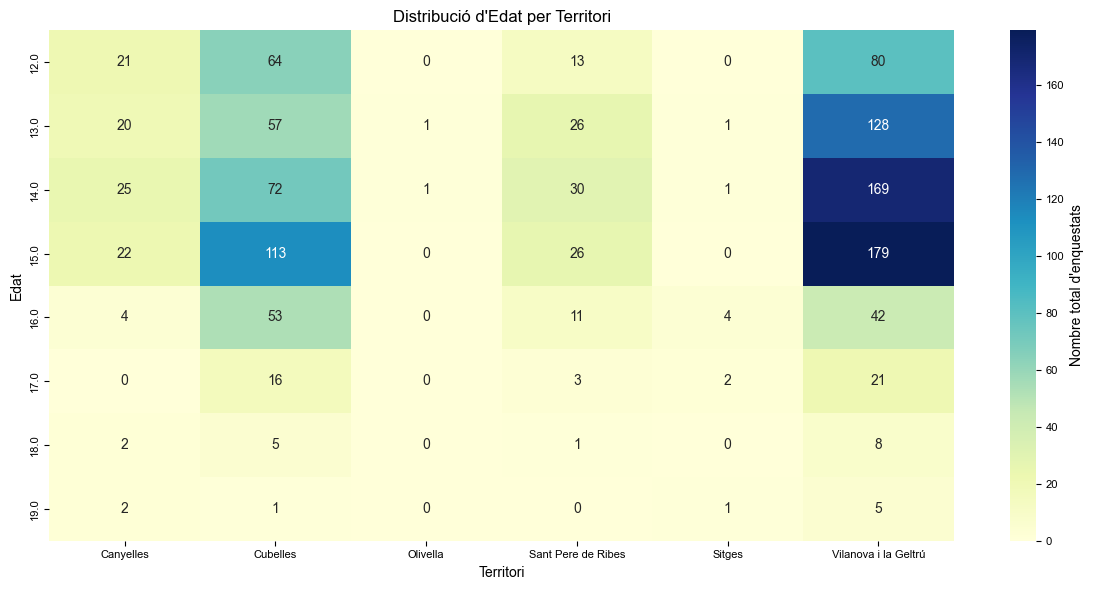

In [72]:
# Tabla para visuializar en que grupos hay m√°s o menos datos
age_territory_distribution = SEJ_demografics.groupby(['Edat', 'Distribuci√≥ Territorial']).size().unstack(fill_value=0)

# Heatmap de la tabla
plt.figure(figsize=(12, 6))
sns.heatmap(age_territory_distribution, annot=True, cmap="YlGnBu", fmt="d", cbar_kws={'label': "Nombre total d'enquestats"})
plt.title('Distribuci√≥ d\'Edat per Territori')
plt.xlabel('Territori')
plt.ylabel('Edat')
plt.tight_layout()
plt.show()


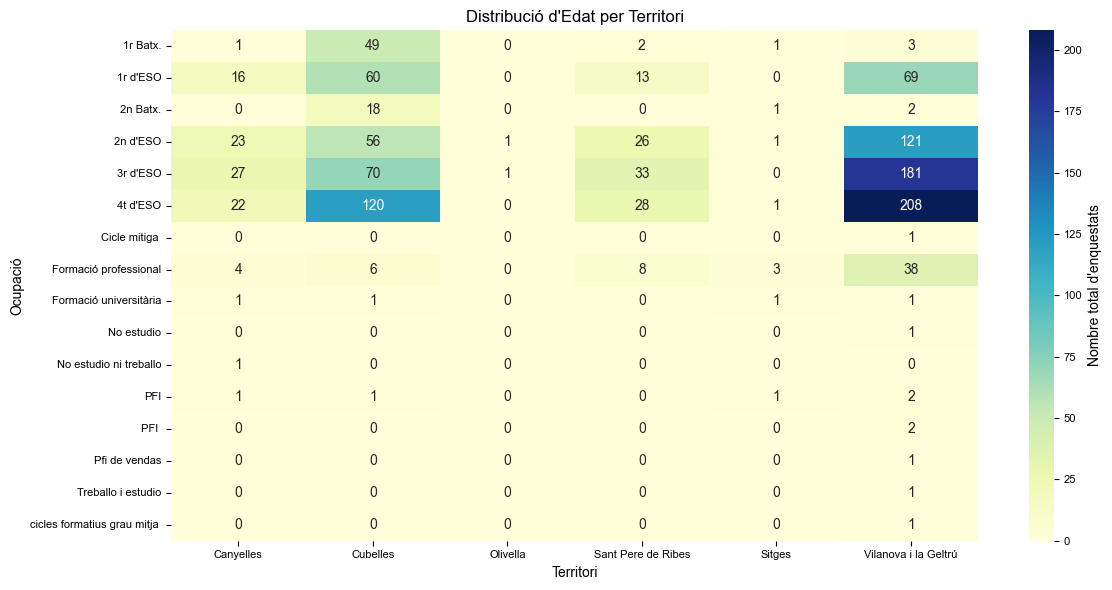

In [73]:
# Tabla para visuializar en que grupos hay m√°s o menos datos
age_territory_distribution = SEJ_demografics.groupby(['Ocupaci√≥', 'Distribuci√≥ Territorial']).size().unstack(fill_value=0)

# Heatmap de la tabla
plt.figure(figsize=(12, 6))
sns.heatmap(age_territory_distribution, annot=True, cmap="YlGnBu", fmt="d", cbar_kws={'label': "Nombre total d'enquestats"})
plt.title('Distribuci√≥ d\'Edat per Territori')
plt.xlabel('Territori')
plt.ylabel('Ocupaci√≥')
plt.tight_layout()
plt.show()


In [13]:
# Cargando y filtrando datos poblacionales segun edades de inter√©s (datos Idescat)
population_df = pd.read_excel(f'{filePopulation}.xlsx', sheet_name='Datos', skiprows=[0], index_col=[0,1]) # segunda hoja llmada Datos, no leer la primera fila
population_df.index.names = ["Edat", "Territori"]

# Entre "11 a√±os" y "18 a√±os"
age_range = [f"{i} a√±os" for i in range(11, 19)]
filtered_population_df = population_df.loc[age_range]
# Suma de "Total" por categoria
territori_absolut_dict = filtered_population_df["Total"].groupby("Territori").sum().to_dict()

## A partir de la informaci√≥n del Idescat
# Calcular el total de mostres
total_mostres = sum(territori_absolut_dict.values())
# Crear un nou diccionari amb les proporcions
territori_proporcio_dict = {territori: (count / total_mostres) * 100 for territori, count in territori_absolut_dict.items()}

In [74]:
# Contamos la muestra actuual por territorio
mostra_actual = SEJ_demografics['Distribuci√≥ Territorial'].value_counts()

#Creamos una tabla con la muestra actual, esperada y faltante
taula_mostra = pd.DataFrame(columns=['Mostra Actual', 'Mostra Esperada', 'Mostra Faltant'])

# Iteramos por cada territorio
for territori, poblacio in territori_absolut_dict.items():
    mostra_esperada = int(poblacio * sample_goal)  # sample_goal = % de la poblaci√≥ a cubrir
    mostra_actual_territori = mostra_actual.get(territori, 0)  # Mostra actual per territori
    mostra_faltant = mostra_esperada - mostra_actual_territori  # Mostra faltant per arribar al 25%
    
    # Anyadimos fila
    taula_mostra.loc[territori] = [mostra_actual_territori, mostra_esperada, mostra_faltant]

# Mostramos la tabla
taula_mostra

Mostra Actual  Mostra Esperada  Mostra Faltant
Canyelles                        96               51             -45
Cubelles                        381              166            -215
Olivella                          2               47              45
Sant Pere de Ribes              110              311             201
Sitges                            9              267             258
Vilanova i la Geltr√∫            632              607             -25

In [75]:
# Contamos la muestra actual por edad, para cada territorio
# Creamos un diccionario para guardar los DataFrames separados por territorio
resultados_territorios = {}

# Lista de todas las edades posibles (de 12 a 19)
edats_possibles = list(range(12, 20))

# Iteramos sobre cada territorio
for territori, poblacio in territori_absolut_dict.items():
    # Calculamos el 25% de la poblaci√≥n de cada territorio y redondeamos al alza
    mostra_esperada = int(np.ceil(poblacio *  sample_goal))  # sample_goal = % de la poblaci√≥ a cubrir
    
    # Filtramos los datos del territorio actual
    mostra_actual_territori = SEJ_demografics[SEJ_demografics['Distribuci√≥ Territorial'] == territori]
    
    # Contamos cu√°ntos individuos hay por cada grupo de edad en el territorio
    mostra_actual_edad = mostra_actual_territori['Edat'].value_counts().sort_index()
    
    # Calculamos la muestra esperada por edad considerando todas las edades de 12 a 19
    mostra_esperada_edad = mostra_esperada / len(edats_possibles)  # Dividimos la muestra esperada entre las edades posibles
    
    # Creamos un DataFrame vac√≠o para guardar los resultados por edad para este territorio
    taula_territori = pd.DataFrame(columns=['Edat', 'Mostra Esperada', 'Mostra Actual', 'Mostra Faltant'])
    
    # A√±adimos los resultados por cada edad de 12 a 19
    for edat in edats_possibles:
        # Obtenemos la muestra actual por edad (si no existe, asignamos 0)
        mostra_actual_edat = mostra_actual_edad.get(edat, 0)  # Si no hay participantes, se asigna 0
        
        # Calculamos cu√°ntos faltan para alcanzar la muestra esperada por edad
        mostra_faltant_edat = max(0, mostra_esperada_edad - mostra_actual_edat)  # Aseguramos que no sea negativa
        
        # Creamos un DataFrame temporal con los resultados por edad
        df_temp = pd.DataFrame([{
            'Edat': edat, 
            'Mostra Esperada': mostra_esperada_edad, 
            'Mostra Actual': mostra_actual_edat, 
            'Mostra Faltant': mostra_faltant_edat
        }])
        
        # Redondeamos los valores de "Mostra Esperada" y "Mostra Faltant" al alza y convertimos a enteros
        df_temp['Mostra Esperada'] = np.ceil(df_temp['Mostra Esperada']).astype(int)
        df_temp['Mostra Faltant'] = np.ceil(df_temp['Mostra Faltant']).astype(int)
        
        # Eliminar columnas vac√≠as o con valores NA en df_temp antes de la concatenaci√≥n
        df_temp = df_temp.dropna(axis=1, how='all')

        # Concatenamos solo si df_temp no est√° vac√≠o
        if not df_temp.empty:
            taula_territori = pd.concat([taula_territori, df_temp], ignore_index=True)

    # Ordenamos el DataFrame por la columna 'Edat' en orden descendente
    taula_territori = taula_territori.sort_values(by='Edat', ascending=False).reset_index(drop=True)
    
    # Guardamos el DataFrame del territorio en el diccionario
    resultados_territorios[territori] = taula_territori

# Ahora 'resultados_territorios' contiene un DataFrame por territorio, puedes acceder a ellos por su nombre
# Ejemplo de acceso al DataFrame de 'Cubelles':
_chosen_territory = 'Cubelles'
for territori, poblacio in territori_absolut_dict.items():
    _chosen_territory = territori
    print(_chosen_territory)
    display(resultados_territorios[_chosen_territory])


Canyelles


Edat Mostra Esperada Mostra Actual Mostra Faltant
0   19               7             2              5
1   18               7             2              5
2   17               7             0              7
3   16               7             4              3
4   15               7            22              0
5   14               7            25              0
6   13               7            20              0
7   12               7            21              0

Cubelles


Edat Mostra Esperada Mostra Actual Mostra Faltant
0   19              21             1             20
1   18              21             5             16
2   17              21            16              5
3   16              21            53              0
4   15              21           113              0
5   14              21            72              0
6   13              21            57              0
7   12              21            64              0

Olivella


Edat Mostra Esperada Mostra Actual Mostra Faltant
0   19               6             0              6
1   18               6             0              6
2   17               6             0              6
3   16               6             0              6
4   15               6             0              6
5   14               6             1              5
6   13               6             1              5
7   12               6             0              6

Sant Pere de Ribes


Edat Mostra Esperada Mostra Actual Mostra Faltant
0   19              39             0             39
1   18              39             1             38
2   17              39             3             36
3   16              39            11             28
4   15              39            26             13
5   14              39            30              9
6   13              39            26             13
7   12              39            13             26

Sitges


Edat Mostra Esperada Mostra Actual Mostra Faltant
0   19              34             1             33
1   18              34             0             34
2   17              34             2             32
3   16              34             4             30
4   15              34             0             34
5   14              34             1             33
6   13              34             1             33
7   12              34             0             34

Vilanova i la Geltr√∫


Edat Mostra Esperada Mostra Actual Mostra Faltant
0   19              76             5             71
1   18              76             8             68
2   17              76            21             55
3   16              76            42             34
4   15              76           179              0
5   14              76           169              0
6   13              76           128              0
7   12              76            80              0

### Extra (c√≥digo para revisar)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame (debes cargar tu DataFrame SEJ_demografics aqu√≠)
# SEJ_demografics = pd.read_csv('path_to_your_file.csv')

# Crear figura y subplots con el tama√±o de A4 (DINA4)
fig, axs = plt.subplots(5, 2, figsize=(8.27, 11.69))  # 5 filas, 2 columnas (10 gr√°ficos) figsize=(8.27, 11.69)
fig.tight_layout(pad=4.0)  # Ajustar espacio entre subplots

# Gr√°fico 1: Distribuci√≥n de la Edat
histplot = sns.histplot(SEJ_demografics['Edat'], kde=True, binwidth=1, ax=axs[0, 0])
axs[0, 0].set_title('Distribuci√≥n de la Edat')
axs[0, 0].set_xlabel('Edat')
axs[0, 0].set_ylabel('Frecuencia')

# Obtener los datos de la gr√°fica
counts = [patch.get_height() for patch in histplot.patches]
bin_edges = [patch.get_x() for patch in histplot.patches] + [patch.get_x() + patch.get_width() for patch in histplot.patches]

# Calcular el total de conteo
total_count = sum(counts)

# A√±adir porcentaje sobre cada bin
for count, bin_edge in zip(counts, bin_edges[:-1]):  # Exclude last edge as it's not a bin
    if count > 0:  # Solo anotar si hay conteo
        percentage = (count / total_count) * 100
        axs[0, 0].text(bin_edge + 0.5, count, f'{percentage:.1f}%', ha='center', va='bottom',fontsize=6,fontfamily='Arial')


# Gr√°fico 2: Relaci√≥n entre Ocupaci√≥n y Edat
sns.boxplot(x='Ocupaci√≥', y='Edat', data=SEJ_demografics, ax=axs[0, 1], order=secuencia_Ocupaci√≥n)
axs[0, 1].set_title('Relaci√≥n entre Ocupaci√≥n y Edat')
axs[0, 1].set_xlabel('Ocupaci√≥n')
axs[0, 1].set_ylabel('Edat')
axs[0, 1].tick_params(axis='x', rotation=90)

# Gr√°fico 3: Distribuci√≥ Territorial
counts = SEJ_demografics['Distribuci√≥ Territorial'].value_counts()
bar_plot = counts.plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('Distribuci√≥ Territorial de los Participantes')
axs[1, 0].set_xlabel('Territorio')
axs[1, 0].set_ylabel('N√∫mero de Participantes')
axs[1, 0].tick_params(axis='x', rotation=90)
# Calcular el total de participantes
total_count = counts.sum()
# A√±adir porcentaje sobre cada barra
for index, value in enumerate(counts):
    percentage = (value / total_count) * 100
    axs[1, 0].text(
        index, 
        value, 
        f'{percentage:.1f}%', 
        ha='center', 
        va='bottom', 
        fontsize=6,  # Tama√±o del texto
        fontfamily='Arial'  # Tipo de letra
    )

# Gr√°fico 4: Relaci√≥n entre Sexe biol√≤gic y G√®nere
# Crear tabla de contingencia
crosstab = pd.crosstab(SEJ_demografics['Sexe biol√≤gic'], SEJ_demografics['G√®nere'])

# Gr√°fico: Relaci√≥n entre Sexe biol√≤gic y G√®nere
crosstab.plot(kind='bar', stacked=True, ax=axs[1, 1])
axs[1, 1].set_title('Relaci√≥n entre Sexe biol√≤gic y G√®nere')
axs[1, 1].set_xlabel('Sexe biol√≤gic')
axs[1, 1].set_ylabel('Frecuencia')
axs[1, 1].legend(title="G√®nere", bbox_to_anchor=(1.05, 1), loc='upper left')

# Calcular porcentajes para cada categor√≠a de Sexe biol√≤gic
for i, (index, row) in enumerate(crosstab.iterrows()):
    total_count = row.sum()
    expected_gender = identificaci√≥n_sexo_genero[index]
    
    if expected_gender in row:
        expected_count = row[expected_gender]
        percentage = (expected_count / total_count) * 100
        
        # A√±adir el texto del porcentaje sobre la barra correspondiente
        # La posici√≥n 'i' corresponde a la ubicaci√≥n del eje x
        axs[1, 1].text(
            i,  # √≠ndice de la barra
            row[expected_gender] + 0.5,  # altura de la barra + un offset
            f'{percentage:.1f}%', 
            ha='center', 
            va='bottom', 
            fontsize=8,  # Tama√±o del texto
            fontfamily='Arial'  # Tipo de letra
        )

# Gr√°fico 5: Relaci√≥n entre Sexe biol√≤gic y Ocupaci√≥n
crosstab = pd.crosstab(SEJ_demografics['Ocupaci√≥'], SEJ_demografics['Sexe biol√≤gic'])
# Reordenar las filas de la tabla de contingencia seg√∫n la secuencia deseada
crosstab = crosstab.reindex(secuencia_Ocupaci√≥n)

# Calcular el total por cada Ocupaci√≥n
total_por_ocupacion = crosstab.sum(axis=1)

# Calcular los porcentajes de "femella" y "mascle"
porcentaje_femella = (crosstab['Femella'] / total_por_ocupacion) * 100
porcentaje_mascle = (crosstab['Mascle'] / total_por_ocupacion) * 100

# Calcular la diferencia de porcentajes
diferencia_porcentajes = porcentaje_femella - porcentaje_mascle

# Graficar la tabla de contingencia
crosstab.plot(kind='bar', stacked=True, ax=axs[2, 0])
axs[2, 0].set_title('Relaci√≥n entre Ocupaci√≥n y Sexe biol√≤gic')
axs[2, 0].set_xlabel('Ocupaci√≥n')
axs[2, 0].set_ylabel('N√∫mero de Participantes')
axs[2, 0].tick_params(axis='x', rotation=90)

# A√±adir el texto de diferencia de porcentajes sobre las barras
for i in range(len(crosstab)):
    axs[2, 0].text(
        i,  # √≠ndice de la barra
        crosstab.iloc[i].sum() + 1,  # altura total de la barra + un offset
        f'{diferencia_porcentajes.iloc[i]:.1f}%',
        ha='center', 
        va='bottom', 
        fontsize=8,  # Tama√±o del texto
        fontfamily='Arial'  # Tipo de letra
    )


# Gr√°fico 6: Distribuci√≥n del n√∫mero de Amb qui vius
sns.histplot(SEJ_demografics['Amb qui vius'], binwidth=1, kde=True, ax=axs[2, 1])
axs[2, 1].set_title('Distribuci√≥n de personas con quienes viven')
axs[2, 1].set_xlabel('Amb qui vius')
axs[2, 1].set_ylabel('Frecuencia')

# Gr√°fico 7: Relaci√≥n entre Edat y Amb qui vius
sns.scatterplot(x='Edat', y='Amb qui vius', data=SEJ_demografics, ax=axs[3, 0])
axs[3, 0].set_title('Relaci√≥n entre Edat y Amb qui vius')
axs[3, 0].set_xlabel('Edat')
axs[3, 0].set_ylabel('Amb qui vius')

# Gr√°fico 8: Distribuci√≥n por G√®nere
SEJ_demografics['G√®nere'].value_counts().plot(kind='bar', ax=axs[3, 1])
axs[3, 1].set_title('Distribuci√≥n por G√®nere')
axs[3, 1].set_xlabel('G√®nere')
axs[3, 1].set_ylabel('N√∫mero de Participantes')
axs[3, 1].tick_params(axis='x', rotation=90)

counts = SEJ_demografics['G√®nere'].value_counts()
bar_plot = counts.plot(kind='bar', ax=axs[3, 1])
axs[3, 1].set_title('Distribuci√≥n por G√©nere')
axs[3, 1].set_xlabel('G√®nere')
axs[3, 1].set_ylabel('N√∫mero de Participantes')
axs[3, 1].tick_params(axis='x', rotation=90)
# Calcular el total de participantes
total_count = counts.sum()
# A√±adir porcentaje sobre cada barra
for index, value in enumerate(counts):
    percentage = (value / total_count) * 100
    axs[3, 1].text(
        index, 
        value, 
        f'{percentage:.1f}%', 
        ha='center', 
        va='bottom', 
        fontsize=6,  # Tama√±o del texto
        fontfamily='Arial'  # Tipo de letra
    )


# Gr√°fico 9: Relaci√≥n entre Distribuci√≥ Territorial y Edat
sns.boxplot(x='Distribuci√≥ Territorial', y='Edat', data=SEJ_demografics, ax=axs[4, 0])
axs[4, 0].set_title('Relaci√≥n entre Distribuci√≥ Territorial y Edat')
axs[4, 0].set_xlabel('Territorio')
axs[4, 0].set_ylabel('Edat')
axs[4, 0].tick_params(axis='x', rotation=90)

# Gr√°fico 10: Relaci√≥n entre G√®nere, Ocupaci√≥n y Amb qui vius
colors = plt.get_cmap('tab20')
pd.crosstab([SEJ_demografics['G√®nere'], SEJ_demografics['Ocupaci√≥']], SEJ_demografics['Amb qui vius']).plot(
    kind='bar', stacked=True, color=[colors(i) for i in range(20)], ax=axs[4, 1])
axs[4, 1].set_title('G√®nere, Ocupaci√≥n y Amb qui vius')
axs[4, 1].set_xlabel('G√®nere y Ocupaci√≥n')
axs[4, 1].set_ylabel('N√∫mero de Personas')
axs[4, 1].tick_params(axis='x', rotation=90)
# Ajustar la leyenda fuera del gr√°fico
axs[4, 1].legend(title="Con quien vives", bbox_to_anchor=(1.05, 1), loc='upper left')

# Guardar como PDF en tama√±o A4
from datetime import date
date = date.today()
today = date.strftime("%Y%m%d")
fileName = os.path.join(savePath,f"{today}_analisis_demograficos_A4.pdf")
plt.savefig(fileName, format='pdf', bbox_inches='tight')
plt.show()
